# Dropout: A Simple Way to Prevent Neural Networks from Overfitting

# Dropout:一种防止神经网络过度拟合的简单方法




# Abstract

# 摘要



Deep neural nets with a large number of parameters are very powerful machine learningsystems. However, overfitting is a serious problem in such networks. Large networks are alsoslow to use, making it difficult to deal with overfitting by combining the predictions of manydifferent large neural nets at test time. Dropout is a technique for addressing this problem. The key idea is to randomly drop units (along with their connections) from the neuralnetwork during training. This prevents units from co-adapting too much. During training,dropout samples from an exponential number of different “thinned” networks. At test time,it is easy to approximate the effect of averaging the predictions of all these thinned networksby simply using a single unthinned network that has smaller weights. This significantlyreduces overfitting and gives major improvements over other regularization methods. Weshow that dropout improves the performance of neural networks on supervised learningtasks in vision, speech recognition, document classification and computational biology,obtaining state-of-the-art results on many benchmark data sets.

带有大量参数的深度神经网络是非常强大的机器学习系统。然而，在这样的网络中，过度拟合是一个严重的问题。大型网络的使用也很低，因此很难通过在测试时结合许多不同大型神经网络的预测来处理过拟合问题。Dropout是一种解决这个问题的技术。关键的想法是在训练过程中从神经网络中随机丢弃单元(连同它们的连接)。这可以防止单位之间的相互适应过度。在训练过程中，从指数级的不同“变薄”的网络中退出样本。在测试时，通过简单地使用一个权重更小的未变薄的网络，就可以很容易地近似出所有这些变薄网络的预测的平均效果。这大大减少了过度拟合，并对其他正则化方法进行了重大改进。在视觉、语音识别、文档分类和计算生物学等监督学习任务中，这种缺失改善了神经网络的性能，在许多基准数据集上获得了最先进的结果。



Keywords: neural networks, regularization, model combination, deep learning

关键词:神经网络，正则化，模型组合，深度学习


# 1. Introduction

# 1. 介绍



Deep neural networks contain multiple non-linear hidden layers and this makes them veryexpressive models that can learn very complicated relationships between their inputs andoutputs. With limited training data, however, many of these complicated relationshipswill be the result of sampling noise, so they will exist in the training set but not in realtest data even if it is drawn from the same distribution. This leads to overfitting and manymethods have been developed for reducing it. These include stopping the training as soon asperformance on a validation set starts to get worse, introducing weight penalties of variouskinds such as L1 and L2 regularization and soft weight sharing (Nowlan and Hinton, 1992).

深度神经网络包含多个非线性隐藏层，这使它们成为非常有表现力的模型，可以学习它们的输入和输出之间非常复杂的关系。然而，在训练数据有限的情况下，许多复杂的关系将是采样噪声的结果，因此它们将存在于训练集中，而不存在于真实测试数据中，即使数据来自相同的分布。这就导致了过度拟合，许多减少过度拟合的方法被开发出来。这些包括一旦验证集的性能开始变差就停止训练，引入各种类型的权重惩罚，如L1和L2正则化和软权重共享(Nowlan和Hinton, 1992)。

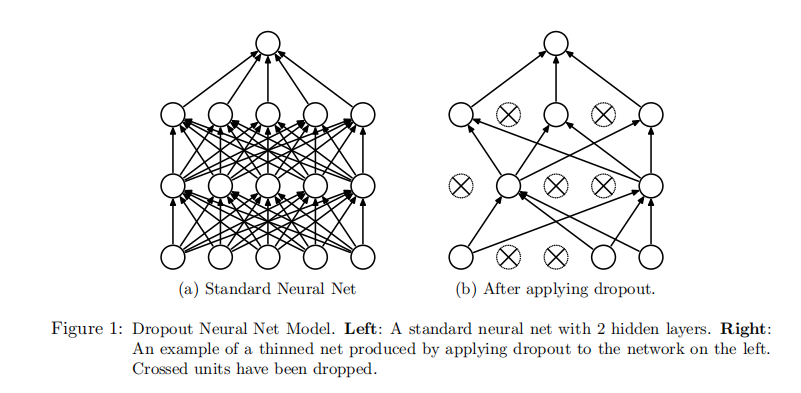

With unlimited computation, the best way to “regularize” a fixed-sized model is toaverage the predictions of all possible settings of the parameters, weighting each setting byits posterior probability given the training data. This can sometimes be approximated quitewell for simple or small models (Xiong et al., 2011; Salakhutdinov and Mnih, 2008), but wewould like to approach the performance of the Bayesian gold standard using considerablyless computation. We propose to do this by approximating an equally weighted geometricmean of the predictions of an exponential number of learned models that share parameters.

由于计算量不受限制，“正则化”固定规模模型的最佳方法是对所有可能的参数设置的预测进行平均，根据给定的训练数据对每个设置的后验概率进行加权。这有时可以很好地近似于简单或小模型(Xiong et al.， 2011;Salakhutdinov和Mnih, 2008年)，但是我们希望使用更少的计算来接近贝叶斯黄金标准的性能。我们建议通过对共享参数的指数型学习模型的预测近似一个等权重的几何平均值来做到这一点。



Model combination nearly always improves the performance of machine learning methods. With large neural networks, however, the obvious idea of averaging the outputs ofmany separately trained nets is prohibitively expensive. Combining several models is mosthelpful when the individual models are different from each other and in order to makeneural net models different, they should either have different architectures or be trainedon different data. Training many different architectures is hard because finding optimalhyperparameters for each architecture is a daunting task and training each large networkrequires a lot of computation. Moreover, large networks normally require large amounts oftraining data and there may not be enough data available to train different networks ondifferent subsets of the data. Even if one was able to train many different large networks,using them all at test time is infeasible in applications where it is important to respondquickly.

模型组合几乎总是能提高机器学习方法的性能。然而，对于大型的神经网络来说，将许多单独训练的网络的输出平均起来的想法显然是非常昂贵的。当单个模型之间存在差异时，组合多个模型是最有效的，为了使不同的网络模型不同，它们应该具有不同的体系结构或接受不同的数据训练。训练许多不同的体系结构是困难的，因为为每个体系结构寻找最优超参数是一项艰巨的任务，而训练每个大型网络需要大量的计算。此外，大型网络通常需要大量的训练数据，而且可能没有足够的数据来训练数据的不同子集上的不同网络。即使能够训练许多不同的大型网络，在测试时使用它们也是不可行的，因为在应用程序中快速响应是很重要的。



Dropout is a technique that addresses both these issues. It prevents overfitting andprovides a way of approximately combining exponentially many different neural networkarchitectures efficiently. The term “dropout” refers to dropping out units (hidden andvisible) in a neural network. By dropping a unit out, we mean temporarily removing it fromthe network, along with all its incoming and outgoing connections, as shown in Figure 1. The choice of which units to drop is random. In the simplest case, each unit is retained witha fixed probability p independent of other units, where p can be chosen using a validation set or can simply be set at 0.5, which seems to be close to optimal for a wide range ofnetworks and tasks. For the input units, however, the optimal probability of retention isusually closer to 1 than to 0.5.

Dropout是一种同时解决这两个问题的技术。它防止了过度拟合，并提供了一种方法，以指数方式有效地结合许多不同的神经网络架构。术语“dropout”指的是在神经网络中退出单元(隐藏的和可见的)。通过丢弃一个单元，我们指的是将其临时从网络中删除，以及所有传入和传出的连接，如图1所示。选择哪个单位是随机的。在最简单的情况下，每个单元都有固定的概率p，与其他单元无关，其中可以使用验证集选择p，也可以简单地将p设置为0.5，这对于广泛的网络和任务来说似乎是最优的。然而，对于输入单元，最佳保留概率通常更接近于1而不是0.5。

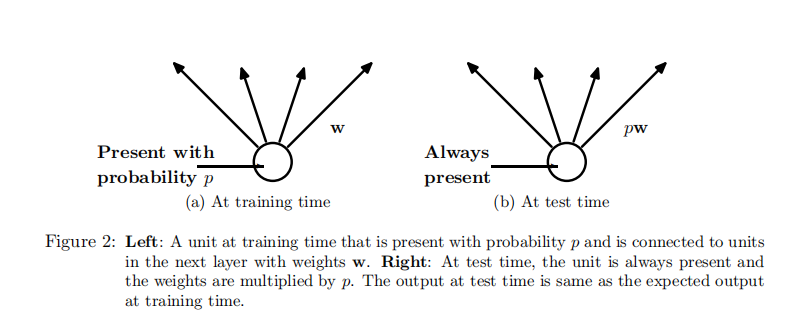

Applying dropout to a neural network amounts to sampling a “thinned” network fromit. The thinned network consists of all the units that survived dropout (Figure 1b). Aneural net with n units, can be seen as a collection of 2n possible thinned neural networks.These networks all share weights so that the total number of parameters is still O(n2), orless. For each presentation of each training case, a new thinned network is sampled andtrained. So training a neural network with dropout can be seen as training a collection of 2^n thinned networks with extensive weight sharing, where each thinned network gets trainedvery rarely, if at all.

将dropout应用于神经网络相当于从一个“稀疏”的网络中取样。变细的网络由所有脱离的单元组成(图1b)。一个有n个单位的神经网络，可以看作是2^n个可能变薄的神经网络的集合。这些网络都共享权重，因此参数的总数仍然是O(n^2)或更少。对于每个训练案例的每个表示，都会采样和训练一个新的瘦化网络。因此，训练一个有缺陷的神经网络可以被看作是训练一组具有广泛权值共享的2^n个稀疏网络，其中每个稀疏网络很少被训练，如果有的话。



At test time, it is not feasible to explicitly average the predictions from exponentiallymany thinned models. However, a very simple approximate averaging method works well inpractice. The idea is to use a single neural net at test time without dropout. The weightsof this network are scaled-down versions of the trained weights. If a unit is retained withprobability p during training, the outgoing weights of that unit are multiplied by p at testtime as shown in Figure 2. This ensures that for any hidden unit the expected output (underthe distribution used to drop units at training time) is the same as the actual output attest time. By doing this scaling, 2^n networks with shared weights can be combined intoa single neural network to be used at test time. We found that training a network withdropout and using this approximate averaging method at test time leads to significantlylower generalization error on a wide variety of classification problems compared to trainingwith other regularization methods.

在测试时，从许多变薄的模型中显式地平均预测结果是不可行的。然而，一个非常简单的近似平均方法在实践中很有效。这个想法是在测试时使用一个单一的神经网络而不退出。这个网络的权重是经过训练的权重的缩小版。如果一个单元在训练中以概率p保留，那么该单元的输出权重在测试时乘以p，如图2所示。这可以确保任何隐藏单元的预期输出(在用于在训练时删除单元的分布下)与实际输出验证时间相同。通过这种缩放，可以将具有共享权值的2^n网络组合成一个单独的神经网络，以便在测试时使用。我们发现，与使用其他正则化方法训练网络相比，在测试时使用这种近似平均方法训练网络，可以显著降低各种分类问题的泛化误差。



The idea of dropout is not limited to feed-forward neural nets. It can be more generallyapplied to graphical models such as Boltzmann Machines. In this paper, we introducethe dropout Restricted Boltzmann Machine model and compare it to standard Restricted

dropout的概念并不局限于前馈神经网络。它可以更广泛地应用于图形模型，如玻尔兹曼机。本文介绍了广义波耳兹曼机模型，并与标准广义波耳兹曼机模型进行了比较.



Boltzmann Machines (RBM). Our experiments show that dropout RBMs are better thanstandard RBMs in certain respects.

玻耳兹曼机(元)。实验表明，在某些方面，中下位RBMs优于标准RBMs。



This paper is structured as follows. Section 2 describes the motivation for this idea. Section 3 describes relevant previous work. Section 4 formally describes the dropout model. Section 5 gives an algorithm for training dropout networks. In Section 6, we present ourexperimental results where we apply dropout to problems in different domains and compareit with other forms of regularization and model combination. Section 7 analyzes the effect ofdropout on different properties of a neural network and describes how dropout interacts withthe network’s hyperparameters. Section 8 describes the Dropout RBM model. In Section 9we explore the idea of marginalizing dropout. In Appendix A we present a practical guidefor training dropout nets. This includes a detailed analysis of the practical considerationsinvolved in choosing hyperparameters when training dropout networks.

本文的结构如下。第二部分描述了这个想法的动机。第3节介绍了以前的相关工作。第四部分正式描述了dropout模型。第5节给出了一种训练dropout网络的算法。在第6节中，我们给出了我们将dropout应用于不同领域问题的基本结果，并与其他形式的正则化和模型组合进行了比较。第7节分析了dropout对神经网络不同属性的影响，并描述了dropout如何与网络的超参数相互作用。第8节描述了Dropout RBM模型。在第9节，我们探讨了边缘化Dropout的想法。在附录A中，我们提出了一个训练Dropout网络的实用指南。这包括一个具体的分析超参数选择时所涉及的实际考虑训dropout网络。




# 2. Motivation

# 2. 动机



A motivation for dropout comes from a theory of the role of sex in evolution (Livnat et al.,2010). Sexual reproduction involves taking half the genes of one parent and half of theother, adding a very small amount of random mutation, and combining them to produce anoffspring. The asexual alternative is to create an offspring with a slightly mutated copy ofthe parent’s genes. It seems plausible that asexual reproduction should be a better way tooptimize individual fitness because a good set of genes that have come to work well togethercan be passed on directly to the offspring. On the other hand, sexual reproduction is likelyto break up these co-adapted sets of genes, especially if these sets are large and, intuitively,this should decrease the fitness of organisms that have already evolved complicated coadaptations. However, sexual reproduction is the way most advanced organisms evolved.

dropout的动机来自于性别在进化中的作用的理论(Livnat et al.，2010)。有性繁殖包括取父母一方的一半基因和另一方的一半基因，加上非常少量的随机突变，然后把它们结合起来产生一个后代。无性繁殖的选择是创造一个带有父代基因稍微变异的后代。无性繁殖似乎是优化个体适应性的一种更好的方式，因为一组良好的协同工作的基因可以直接传递给后代。另一方面，有性繁殖可能会破坏这些共适应的基因集，尤其是当这些基因集很大时，直觉上，这应该会降低已经进化出复杂的共适应的生物体的适应性。然而，有性生殖是大多数高级生物进化的方式。



One possible explanation for the superiority of sexual reproduction is that, over the longterm, the criterion for natural selection may not be individual fitness but rather mix-abilityof genes. The ability of a set of genes to be able to work well with another random set ofgenes makes them more robust. Since a gene cannot rely on a large set of partners to bepresent at all times, it must learn to do something useful on its own or in collaboration witha small number of other genes. According to this theory, the role of sexual reproductionis not just to allow useful new genes to spread throughout the population, but also tofacilitate this process by reducing complex co-adaptations that would reduce the chance ofa new gene improving the fitness of an individual. Similarly, each hidden unit in a neuralnetwork trained with dropout must learn to work with a randomly chosen sample of otherunits. This should make each hidden unit more robust and drive it towards creating usefulfeatures on its own without relying on other hidden units to correct its mistakes. However,the hidden units within a layer will still learn to do different things from each other. Onemight imagine that the net would become robust against dropout by making many copiesof each hidden unit, but this is a poor solution for exactly the same reason as replica codesare a poor way to deal with a noisy channel.

有性繁殖优势的一种可能解释是，从长期来看，自然选择的标准可能不是个体的适应性，而是基因的混合能力。一组基因能够很好地与另一组随机基因协同工作的能力使它们更加健壮。由于一个基因不能依赖大量的伙伴在任何时候出现，它必须学会自己做一些有用的事情，或者与少量的其他基因协作。根据这一理论，有性生殖的作用不仅是让有用的新基因在人群中传播，而且还通过减少复杂的协同适应来促进这一过程，这种协同适应会减少新基因提高个体适应性的机会。同样地，在一个训练过的神经网络中，每一个隐藏的单元都必须学会使用随机选择的其他单元样本。这将使每个隐藏单元更加健壮，并推动它自己创建有用的特性，而不依赖于其他隐藏单元来纠正其错误。然而，一个层中的隐藏单元仍然会学习做不同的事情。也许有人会想象，通过复制每个隐藏单元的多个副本，网络将变得健壮，从而防止掉线，但这是一个糟糕的解决方案，其原因与复制代码处理噪声信道的糟糕方法完全相同。



A closely related, but slightly different motivation for dropout comes from thinking about successful conspiracies. Ten conspiracies each involving five people is probably abetter way to create havoc than one big conspiracy that requires fifty people to all playtheir parts correctly. If conditions do not change and there is plenty of time for rehearsal, abig conspiracy can work well, but with non-stationary conditions, the smaller the conspiracythe greater its chance of still working. Complex co-adaptations can be trained to work wellon a training set, but on novel test data they are far more likely to fail than multiple simplerco-adaptations that achieve the same thing.

dropout的一个密切相关但又略有不同的动机来自对成功的阴谋的思考。十场阴谋，每一场涉及五个人，可能比一场大阴谋更容易造成破坏，而一场大阴谋需要五十个人都正确地扮演各自的角色。如果情况没有改变，而且有足够的时间进行排练，那么一个大的阴谋就可以很好地发挥作用，但在非固定条件下，阴谋越小，其继续发挥作用的机会就越大。复杂的协同适应可以在一个训练集上训练得很好，但在新的测试数据上，它们失败的可能性远远大于实现同一目的的多个简单的协同适应。




# 3. Related Work

# 3.相关工作



Dropout can be interpreted as a way of regularizing a neural network by adding noise toits hidden units. The idea of adding noise to the states of units has previously been used inthe context of Denoising Autoencoders (DAEs) by Vincent et al. (2008, 2010) where noiseis added to the input units of an autoencoder and the network is trained to reconstruct thenoise-free input. Our work extends this idea by showing that dropout can be effectivelyapplied in the hidden layers as well and that it can be interpreted as a form of modelaveraging. We also show that adding noise is not only useful for unsupervised featurelearning but can also be extended to supervised learning problems. In fact, our method canbe applied to other neuron-based architectures, for example, Boltzmann Machines. While5% noise typically works best for DAEs, we found that our weight scaling procedure appliedat test time enables us to use much higher noise levels. Dropping out 20% of the input unitsand 50% of the hidden units was often found to be optimal.

Dropout可以解释为一种通过向神经网络的隐藏单元添加噪声来调节神经网络的方法。向单元状态添加噪声的想法之前已经在Vincent等人(2008,2010)的去噪自动编码器(DAEs)的环境中使用过，在自动编码器的输入单元中添加噪声，并对网络进行训练，以重构无噪声的输入。我们的工作扩展了这个想法，通过展示dropout也可以有效地应用于隐藏层，并且它可以被解释为一种模型平均的形式。我们还证明了添加噪声不仅对无监督特征学习有用，而且可以推广到监督学习问题。事实上，我们的方法可以应用于其他基于神经元的结构，例如，玻尔兹曼机。虽然5%的噪声通常最适合DAEs，但我们发现，我们在测试时应用的权重缩放程序使我们能够使用更高的噪声水平。去掉20%的输入单元和50%的隐藏单元通常是最优的。



Since dropout can be seen as a stochastic regularization technique, it is natural toconsider its deterministic counterpart which is obtained by marginalizing out the noise. Inthis paper, we show that, in simple cases, dropout can be analytically marginalized outto obtain deterministic regularization methods. Recently, van der Maaten et al. (2013)also explored deterministic regularizers corresponding to different exponential-family noisedistributions, including dropout (which they refer to as “blankout noise”). However, theyapply noise to the inputs and only explore models with no hidden layers. Wang and Manning(2013) proposed a method for speeding up dropout by marginalizing dropout noise. Chenet al. (2012) explored marginalization in the context of denoising autoencoders.

由于dropout可以被看作是一种随机正则化技术，因此很自然地要考虑它的确定性对手，这是通过边缘化噪声得到的。在本文中，我们证明，在简单的情况下，dropout可以被分析地边缘化出来，以获得确定性的正则化方法。最近，van der Maaten等人(2013)也探索了不同指数族噪声分布对应的确定性正则化器，包括dropout(他们称之为“熄灭噪声”)。然而，他们将噪声应用于输入，并且只探索没有隐藏层的模型。Wang和Manning(2013)提出了一种通过边缘化dropout噪声来加速dropout的方法。Chenet al.(2012)在去噪自动编码器的背景下探索了边缘化。



In dropout, we minimize the loss function stochastically under a noise distribution. This can be seen as minimizing an expected loss function. Previous work of Globerson and Roweis (2006); Dekel et al. (2010) explored an alternate setting where the loss is minimizedwhen an adversary gets to pick which units to drop. Here, instead of a noise distribution,the maximum number of units that can be dropped is fixed. However, this work also doesnot explore models with hidden units.

在dropout中，我们在噪声分布下随机最小化损失函数。这可以看作是最小化预期损失函数。Globerson and Roweis(2006)的前期工作;Dekel等人(2010)探索了另一种设置，即当对手选择要放弃哪些单位时，损失最小。在这里，可以丢弃的最大单元数是固定的，而不是噪声分布。然而，这项工作也没有探索带有隐藏单元的模型。






# 4. Model Description

# 4. 模型描述



This section describes the dropout neural network model. Consider a neural network with L hidden layers. Let l ∈ {1, . . . , L} index the hidden layers of the network. Let z(l) denotethe vector of inputs into layer l, y(l) denote the vector of outputs from layer l (y(0) = x isthe input). W(l) and b(l) are the weights and biases at layer l. The feed-forward operationof a standard neural network (Figure 3a) can be described as (for l ∈ {0, . . . , L L 1} andany hidden unit i)

本节描述了dropout神经网络模型。考虑一个具有L个隐层的神经网络。令l∈{1，…， L}索引网络的隐含层。设z(l)表示输入到l层的向量，y(l)表示输出到l层的向量(y(0) = x是输入)。W(l)和b(l)是第l层的权值和偏差。标准神经网络的前馈运行(图3a)可以描述为(对于l∈{0，…， L L 1}和任何隐藏单元i)

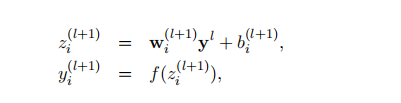

where f is any activation function, for example, f(x) = 1/ (1 + exp((x)).

其中f是任意的激活函数，例如，f(x) = 1/ (1 + exp(x))。



With dropout, the feed-forward operation becomes (Figure 3b)

有了dropout，前馈操作就变成(图3b)

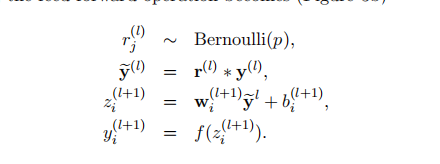
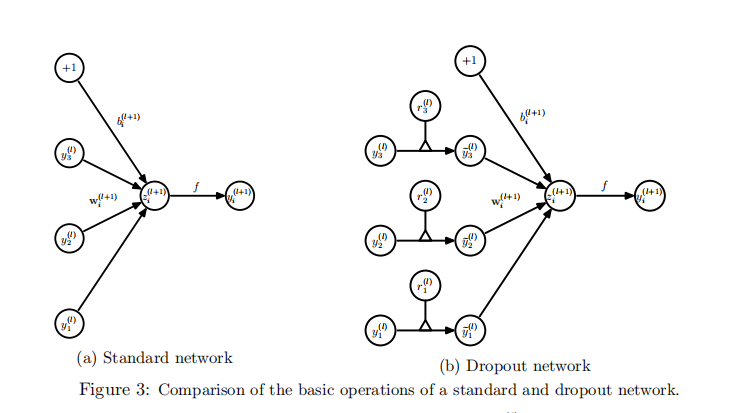
Here ∗ denotes an element-wise product. For any layer l, r(l)is a vector of independent Bernoulli random variables each of which has probability p of being 1. This vector issampled and multiplied element-wise with the outputs of that layer, y(l), to create thethinned outputs ye(l). The thinned outputs are then used as input to the next layer. Thisprocess is applied at each layer. This amounts to sampling a sub-network from a largernetwork. For learning, the derivatives of the loss function are backpropagated through the sub-network. At test time, the weights are scaled as W(l)test = pW(l) as shown in Figure 2. The resulting neural network is used without dropout.

这里显示的是一个元素明智的产品。对于任意层l, r(l)是独立伯努利随机变量的向量每一个都有p为1的概率。这个向量被采样，并与该层的输出y(l)相乘，以创建稀薄的输出y~(l)。稀释后的输出被用作下一层的输入。这个过程应用于每一层。这相当于从一个更大的网络中抽样一个子网络。为了学习，损失函数的导数通过子网络反向传播。在测试时，权值被缩放为W(l)test = pW(l)，如图2所示。得到的神经网络使用没有Dropout。




# 5. Learning Dropout Nets

# 5. 学习Dropout网络



This section describes a procedure for training dropout neural nets.

## 5.1 Backpropagation 
## 5.1反向传播
Dropout neural networks can be trained using stochastic gradient descent in a manner similar to standard neural nets. The only difference is that for each training case in a mini-batch,we sample a thinned network by dropping out units. Forward and backpropagation for thattraining case are done only on this thinned network. The gradients for each parameter areaveraged over the training cases in each mini-batch. Any training case which does not use aparameter contributes a gradient of zero for that parameter. Many methods have been usedto improve stochastic gradient descent such as momentum, annealed learning rates and L2weight decay. Those were found to be useful for dropout neural networks as well.


Dropout神经网络可以采用类似于标准神经网络的方法，利用随机梯度下降法对神经网络进行训练。唯一的区别是，对于迷你批处理中的每个训练用例，我们通过删除单元对一个瘦化的网络进行取样。这个训练用例的前向和后向传播只在这个稀疏的网络上进行。在每个小批的训练案例中，对每个参数的梯度进行平均。任何不使用aparameter的训练用例都会为该参数提供一个零梯度。利用动量、退火学习速率和L2weight衰减等方法来改进随机梯度下降。这些被发现对辍学神经网络也很有用。



One particular form of regularization was found to be especially useful for dropout—constraining the norm of the incoming weight vector at each hidden unit to be upperbounded by a fixed constant c. In other words, if w represents the vector of weights incidenton any hidden unit, the neural network was optimized under the constraint ||w||2 ≤ c. Thisconstraint was imposed during optimization by projecting w onto the surface of a ball ofradius c, whenever w went out of it. This is also called max-norm regularization since itimplies that the maximum value that the norm of any weight can take is c. The constantc is a tunable hyperparameter, which is determined using a validation set. Max-normregularization has been previously used in the context of collaborative filtering (Srebro and Shraibman, 2005). It typically improves the performance of stochastic gradient descenttraining of deep neural nets, even when no dropout is used.

一个特定形式的正规化被发现特别适合dropout-constraining常态传入的权向量在每个隐藏单元由一个固定的常数c upperbounded。换句话说,如果w代表权重的向量incidenton任何隐藏的单位,约束条件下的神经网络优化| |女| | 2≤c。Thisconstraint期间实施优化,将w投射在一个球的表面ofradius c,每当w出去。这也被称为max-norm正规化itimplies以来的最大价值的标准体重可以是c。constantc是可调hyperparameter,决定使用一个验证集。Max-normregularization已经被先前的上下文中使用协同过滤(Srebro Shraibman, 2005)。它通常可以提高深度神经网络的随机梯度递减训练的性能，即使在没有使用dropout的情况下。



Although dropout alone gives significant improvements, using dropout along with maxnorm regularization, large decaying learning rates and high momentum provides a significantboost over just using dropout. A possible justification is that constraining weight vectorsto lie inside a ball of fixed radius makes it possible to use a huge learning rate without thepossibility of weights blowing up. The noise provided by dropout then allows the optimization process to explore different regions of the weight space that would have otherwise beendifficult to reach. As the learning rate decays, the optimization takes shorter steps, therebydoing less exploration and eventually settles into a minimum.

尽管单是dropout就可以提供显著的改进，但是使用dropout和maxnorm正则化，巨大的衰减学习率和高动量比仅仅使用dropout提供了显著的提升。一种可能的理由是，将权重向量限制在一个半径固定的球内，可以在不增加权重的情况下使用巨大的学习率。dropout提供的噪声允许优化过程探索不同区域的权重空间，否则很难达到。随着学习速度的降低，优化过程的步骤会缩短，从而减少探索，最终达到最小值。



## 5.2 Unsupervised Pretraining

## 5.2无监督Pretraining



Neural networks can be pretrained using stacks of RBMs (Hinton and Salakhutdinov, 2006),autoencoders (Vincent et al., 2010) or Deep Boltzmann Machines (Salakhutdinov and Hinton, 2009). Pretraining is an effective way of making use of unlabeled data. Pretrainingfollowed by finetuning with backpropagation has been shown to give significant performanceboosts over finetuning from random initializations in certain cases.

神经网络可以使用成堆的RBMs (Hinton and Salakhutdinov, 2006)、自动编码器(Vincent et al.， 2010)或深波耳兹曼机(Salakhutdinov and Hinton, 2009)进行预训练。预培训是利用未标记数据的一种有效方法。在某些情况下，先进行预训练，然后使用反向传播进行finetuning，可以显著提高finetuning的性能。



Dropout can be applied to finetune nets that have been pretrained using these techniques. The pretraining procedure stays the same. The weights obtained from pretrainingshould be scaled up by a factor of 1/p. This makes sure that for each unit, the expectedoutput from it under random dropout will be the same as the output during pretraining. We were initially concerned that the stochastic nature of dropout might wipe out the information in the pretrained weights. This did happen when the learning rates used duringfinetuning were comparable to the best learning rates for randomly initialized nets. However, when the learning rates were chosen to be smaller, the information in the pretrainedweights seemed to be retained and we were able to get improvements in terms of the final generalization error compared to not using dropout when finetuning.

Dropout可以应用于finetune网络，已预先训练使用这些技术。训练前的程序保持不变。从预训练中获得的权重应该按1/p的比例增加。这确保了对于每个单元，随机退出时的期望输出将与训练前的输出相同。我们最初关心的是，dropout的随机性可能会抹去预先训练的权重中的信息。当finetuning过程中使用的学习速率与随机初始化网络的最佳学习速率相当时，确实会发生这种情况。然而，当学习速率被选择为更小的时候，预训练权重中的信息似乎被保留了，我们能够在最后概括误差方面得到改善，而不是在finetuning的时候不使用dropout。




# 6. Experimental Results

# 6. 实验结果



We trained dropout neural networks for classification problems on data sets in differentdomains. We found that dropout improved generalization performance on all data setscompared to neural networks that did not use dropout. Table 1 gives a brief description ofthe data sets. The data sets are

我们训练dropout神经网络来解决不同领域数据集的分类问题。我们发现，与没有使用dropout的神经网络相比，dropout可以提高所有数据集的泛化性能。表1给出了数据集的简要描述。数据集是



• MNIST : A standard toy data set of handwritten digits.

•MNIST:一个标准的手写数字玩具数据集。



• TIMIT : A standard speech benchmark for clean speech recognition.

•TIMIT:清洁语音识别的标准语音基准。



• CIFAR-10 and CIFAR-100 : Tiny natural images (Krizhevsky, 2009).

•CIFAR-10和CIFAR-100:微小的自然图像(Krizhevsky, 2009)。



• Street View House Numbers data set (SVHN) : Images of house numbers collected by

•街景房号数据集(SVHN):收集的房号图像



Google Street View (Netzer et al., 2011).

谷歌街景(Netzer et al.， 2011)。



• ImageNet : A large collection of natural images.

• ImageNet:大量自然图像的集合。



• Reuters-RCV1 : A collection of Reuters newswire articles.

• Reuters- rcv1:路透社新闻专线文章合集。



• Alternative Splicing data set: RNA features for predicting alternative gene splicing

• Alternative Splicing data set:用于预测选择性基因剪接的RNA特征



We chose a diverse set of data sets to demonstrate that dropout is a general techniquefor improving neural nets and is not specific to any particular application domain. In thissection, we present some key results that show the effectiveness of dropout. A more detaileddescription of all the experiments and data sets is provided in Appendix B.

我们选择了一组不同的数据集来证明，dropout是一种改进神经网络的通用技术，并不针对任何特定的应用领域。在本节中，我们展示了一些关键的结果，显示了辍学的有效性。附录B提供了所有实验和数据集的更详细描述。

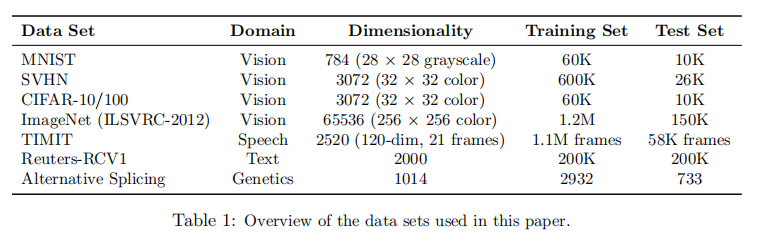

## 6.1 Results on Image Data Sets

## 6.1图像数据集的结果



We used five image data sets to evaluate dropout—MNIST, SVHN, CIFAR-10, CIFAR-100and ImageNet. These data sets include different image types and training set sizes. Modelswhich achieve state-of-the-art results on all of these data sets use dropout.

我们使用了5个图像数据集来评估dropout-MNIST、SVHN、CIFAR-10、cifar -100和ImageNet。这些数据集包括不同的图像类型和训练集大小。在所有这些数据集上获得最新结果的模型都使用了dropout。



### 6.1.1 MNIST

### 6.1.1 MNIST

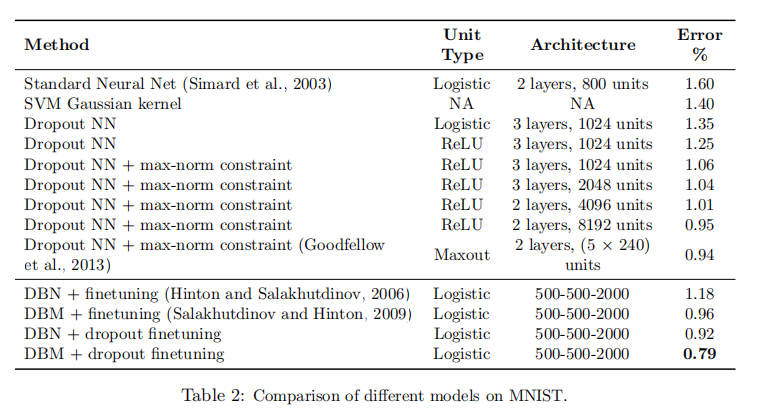

The MNIST data set consists of 28 × 28 pixel handwritten digit images. The task isto classify the images into 10 digit classes. Table 2 compares the performance of dropoutwith other techniques. The best performing neural networks for the permutation invariantsetting that do not use dropout or unsupervised pretraining achieve an error of about1.60% (Simard et al., 2003). With dropout the error reduces to 1.35%. Replacing logisticunits with rectified linear units (ReLUs) (Jarrett et al., 2009) further reduces the error to1.25%. Adding max-norm regularization again reduces it to 1.06%. Increasing the size ofthe network leads to better results. A neural net with 2 layers and 8192 units per layergets down to 0.95% error. Note that this network has more than 65 million parameters andis being trained on a data set of size 60,000. Training a network of this size to give goodgeneralization error is very hard with standard regularization methods and early stopping. Dropout, on the other hand, prevents overfitting, even in this case. It does not even needearly stopping. Goodfellow et al. (2013) showed that results can be further improved to0.94% by replacing ReLU units with maxout units. All dropout nets use p = 0.5 for hiddenunits and p = 0.8 for input units. More experimental details can be found in Appendix B.1.

MNIST数据集由28×28像素的手写数字图像组成。任务是将图像分类为10个数字类。表2比较了dropout与其他技术的性能。对于不使用dropout或无监督预训练的排列不变设置，性能最佳的神经网络的误差约为1.60% (Simard et al.， 2003)。使用dropout时，错误降低到1.35%。将逻辑单元替换为修正线性单元(ReLUs) (Jarrett et al.， 2009)进一步将误差降低到1.25%。添加最大-范数正则化再次将其降低到1.06%。增加网络的规模会带来更好的结果。一个2层8192个单位的神经网络可以将误差降低到0.95%。请注意，这个网络有超过6500万个参数，并且正在对大小为60,000的数据集进行训练。使用标准的正则化方法和早期停止，很难训练出这种规模的网络来提供良好的泛化误差。另一方面，Dropout可以防止过度拟合，即使在这种情况下也是如此。它甚至不需要停止。Goodfellow等(2013)研究表明，将ReLU单元替换为maxout单元后，结果可以进一步提高到0.94%。所有的dropout网对隐藏单元使用p = 0.5，对输入单元使用p = 0.8。更多的实验细节可以在附录B.1中找到。



Dropout nets pretrained with stacks of RBMs and Deep Boltzmann Machines also giveimprovements as shown in Table 2. DBM—pretrained dropout nets achieve a test error of0.79% which is the best performance ever reported for the permutation invariant setting.We note that it possible to obtain better results by using 2-D spatial information andaugmenting the training set with distorted versions of images from the standard trainingset. We demonstrate the effectiveness of dropout in that setting on more interesting datasets.

用成堆的rbm和深玻尔兹曼机预先训练的Dropout网也有改进，如表2所示。dbm预训练的dropout网实现了0.79%的测试误差，这是迄今为止关于置换不变设置的最佳性能报告。我们注意到，通过使用二维空间信息并使用标准训练集的失真图像对训练集进行扩充，可以获得更好的结果。我们在更有趣的数据集上演示了dropout的有效性。

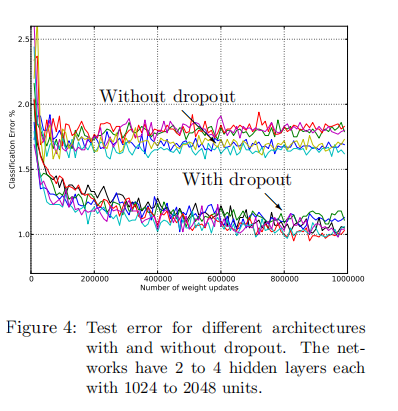

In order to test the robustness ofdropout, classification experiments weredone with networks of many different architectures keeping all hyperparameters, including p, fixed. Figure 4 shows the testerror rates obtained for these different architectures as training progresses. Thesame architectures trained with and without dropout have drastically different testerrors as seen as by the two separate clusters of trajectories. Dropout gives a hugeimprovement across all architectures, without using hyperparameters that were tunedspecifically for each architecture.

为了检验dropout的鲁棒性，分类实验是在多个不同架构的网络保持包括p在内的所有超参数不变的情况下进行的。图4显示了这些不同体系结构在培训过程中获得的testerror比率。相同的架构，训练和没有dropout有截然不同的检测系统，因为所看到的两个单独的集群轨迹。Dropout在所有架构上都有巨大的改进，无需使用专门针对每个架构进行调优的超参数。



### 6.1.2 Street View House Numbers

### 6.1.2街景房号



The Street View House Numbers (SVHN) Data Set (Netzer et al., 2011) consists ofcolor images of house numbers collected by Google Street View. Figure 5a shows some examples of images from this data set. Thepart of the data set that we use in our experiments consists of 32 × 32 color images roughlycentered on a digit in a house number. The task is to identify that digit.

街景房号(SVHN)数据集(Netzer et al.， 2011)由谷歌街景收集的房号彩色图像组成。图5a展示了一些来自该数据集的图像示例。我们在实验中使用的数据集部分由32×32张彩色图像组成，大致以房号中的数字为中心。任务是识别那个数字。


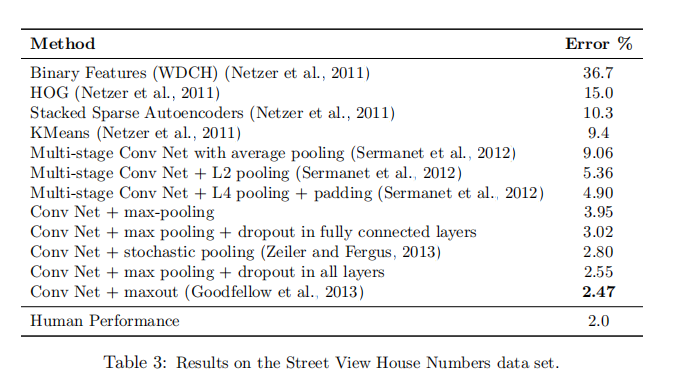

For this data set, we applied dropout to convolutional neural networks (LeCun et al.,1989). The best architecture that we found has three convolutional layers followed by 2fully connected hidden layers. All hidden units were ReLUs. Each convolutional layer wasfollowed by a max-pooling layer. Appendix B.2 describes the architecture in more detail. Dropout was applied to all the layers of the network with the probability of retaining a hidden unit being p = (0.9, 0.75, 0.75, 0.5, 0.5, 0.5) for the different layers of the network (goingfrom input to convolutional layers to fully connected layers). Max-norm regularization wasused for weights in both convolutional and fully connected layers. Table 3 compares theresults obtained by different methods. We find that convolutional nets outperform othermethods. The best performing convolutional nets that do not use dropout achieve an errorrate of 3.95%. Adding dropout only to the fully connected layers reduces the error to 3.02%. Adding dropout to the convolutional layers as well further reduces the error to 2.55%. Evenmore gains can be obtained by using maxout units.

对于这个数据集，我们将dropout应用于卷积神经网络(LeCun et al.，1989)。我们发现最好的架构有三个卷积层，然后是两个完全连接的隐藏层。所有隐藏单位都是ReLUs。每个卷积层后面都有一个最大池化层。附录B.2更详细地描述了体系结构。Dropout应用于网络的所有层，对于网络的不同层(从输入层到卷积层再到全连接层)，隐藏单元保留的概率为p =(0.9, 0.75, 0.75, 0.5, 0.5, 0.5)。最大模正则化用于卷积和全连接层的权值。表3比较了不同方法得到的结果。我们发现卷积网优于其他方法。不使用dropout的性能最好的卷积网的误差率为3.95%。只在完全连接的层上添加dropout，可以将错误降低到3.02%。在卷积层中添加dropout也进一步将错误降低到2.55%。使用maxout单元可以获得更多的增益。



The additional gain in performance obtained by adding dropout in the convolutionallayers (3.02% to 2.55%) is worth noting. One may have presumed that since the convolutional layers don’t have a lot of parameters, overfitting is not a problem and thereforedropout would not have much effect. However, dropout in the lower layers still helps because it provides noisy inputs for the higher fully connected layers which prevents themfrom overfitting.

在convolutionallayers中添加dropout(3.02%到2.55%)可以获得额外的性能收益。人们可能会认为，由于卷积层没有很多参数，所以过拟合不是问题，因此eforedropout不会有太大影响。但是，低层的dropout仍然有帮助，因为它为高层全连接层提供了噪声输入，防止它们过度拟合。



### 6.1.3 CIFAR-10 and CIFAR-100

### 6.1.3 CIFAR-10和CIFAR-100

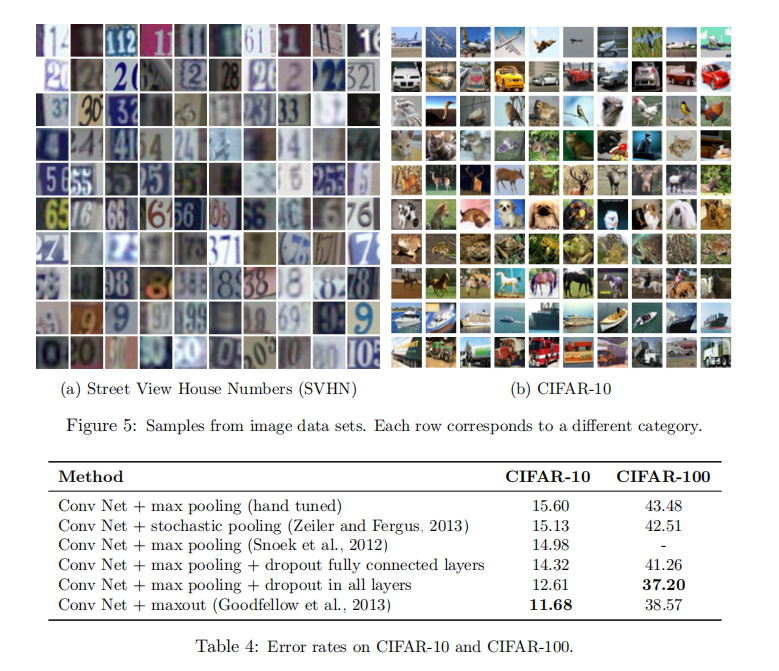

The CIFAR-10 and CIFAR-100 data sets consist of 32 × 32 color images drawn from 10and 100 categories respectively. Figure 5b shows some examples of images from this dataset. A detailed description of the data sets, input preprocessing, network architectures andother experimental details is given in Appendix B.3. Table 4 shows the error rate obtainedby different methods on these data sets. Without any data augmentation, Snoek et al.(2012) used Bayesian hyperparameter optimization to obtained an error rate of 14.98% onCIFAR-10. Using dropout in the fully connected layers reduces that to 14.32% and addingdropout in every layer further reduces the error to 12.61%. Goodfellow et al. (2013) showedthat the error is further reduced to 11.68% by replacing ReLU units with maxout units. OnCIFAR-100, dropout reduces the error from 43.48% to 37.20% which is a huge improvement. No data augmentation was used for either data set (apart from the input dropout).

CIFAR-10和CIFAR-100数据集分别由10个类别和100个类别的32×32张彩色图像组成。图5b显示了来自这个数据集的一些图像示例。附录B.3给出了数据集、输入预处理、网络结构和其他实验细节的详细描述。表4显示了不同方法在这些数据集上获得的错误率。Snoek et al.(2012)在不增加任何数据的情况下，使用贝叶斯超参数优化方法，获得了14.98%的onCIFAR-10错误率。在全连接层中使用dropout可将该值降低到14.32%，在每一层中添加dropout可将该值进一步降低到12.61%。Goodfellow等(2013)的研究表明，将ReLU单元替换为maxout单元后，该误差进一步降低到11.68%。OnCIFAR-100, dropout将错误从43.48%减少到37.20%，这是一个巨大的进步。这两个数据集都没有使用数据扩充(除了输入丢失)。



### 6.1.4 ImageNet

### 6.1.4 ImageNet



ImageNet is a data set of over 15 million labeled high-resolution images belonging to roughly22,000 categories. Starting in 2010, as part of the Pascal Visual Object Challenge, an annualcompetition called the ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) hasbeen held. A subset of ImageNet with roughly 1000 images in each of 1000 categories isused in this challenge. Since the number of categories is rather large, it is conventional toreport two error rates: top-1 and top-5, where the top-5 error rate is the fraction of testimages for which the correct label is not among the five labels considered most probable bythe model. Figure 6 shows some predictions made by our model on a few test images.

ImageNet是一个数据集，包含超过1500万张标记的高分辨率图像，大致属于22000个类别。从2010年开始，作为Pascal视觉对象挑战赛的一部分，每年都会举办一场名为ImageNet大型视觉识别挑战赛(ILSVRC)的竞赛。在这个挑战中，我们使用了ImageNet的一个子集，它包含1000个类别中的每个类别大约1000个图像。因为类别的数量相当大，所以通常报告两个错误率:top 1和top 5，其中top 5错误率是testimages的比例，其中正确的标签不在模型认为最可能的五个标签之列。图6显示了我们的模型对一些测试图像所做的一些预测。



ILSVRC-2010 is the only version of ILSVRC for which the test set labels are available, somost of our experiments were performed on this data set. Table 5 compares the performanceof different methods. Convolutional nets with dropout outperform other methods by a largemargin. The architecture and implementation details are described in detail in Krizhevskyet al. (2012).

ILSVRC-2010是唯一一个有测试集标签的ILSVRC版本，我们的大部分实验都是在这个数据集上进行的。表5比较了不同方法的性能。带有dropout的卷积网比其他方法要好得多。体系结构和实现细节在Krizhevskyet al.(2012)中详细描述。

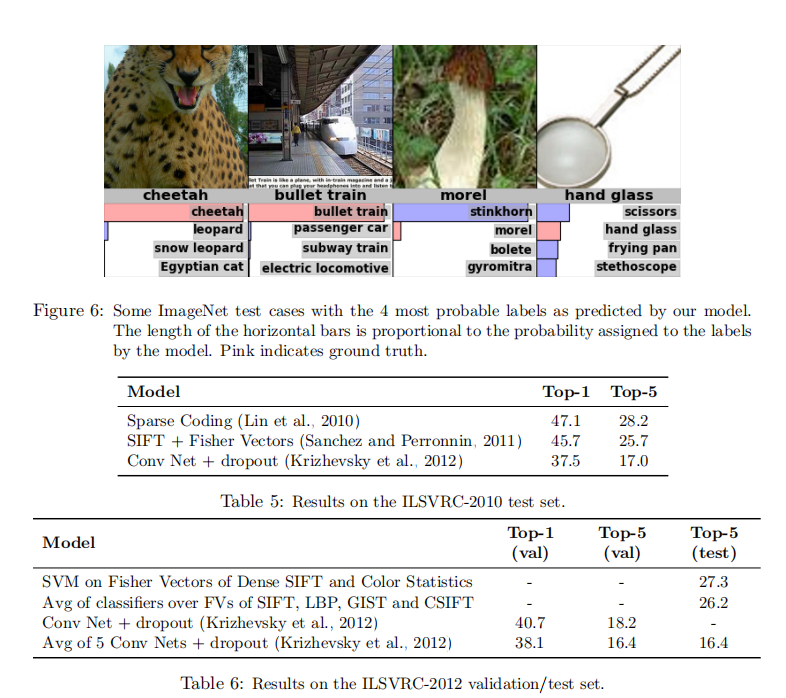

Our model based on convolutional nets and dropout won the ILSVRC-2012 competition. Since the labels for the test set are not available, we report our results on the test set forthe final submission and include the validation set results for different variations of ourmodel. Table 6 shows the results from the competition. While the best methods based onstandard vision features achieve a top-5 error rate of about 26%, convolutional nets withdropout achieve a test error of about 16% which is a staggering difference. Figure 6 showssome examples of predictions made by our model. We can see that the model makes veryreasonable predictions, even when its best guess is not correct.

我们基于convolutional nets和dropout的模型赢得了ILSVRC-2012的比赛。由于测试集的标签不可用，我们报告测试集的结果以供最终提交，并包括我们的模型的不同变体的验证集结果。表6显示了比赛的结果。基于标准视觉特性的最佳方法的前5名错误率约为26%，而没有dropout的卷积网的测试错误率约为16%，这是一个惊人的差异。图6显示了我们的模型做出的预测的一些示例。我们可以看到，这个模型做出了非常合理的预测，即使它最好的猜测是不正确的。



## 6.2 Results on TIMIT

## 6.2 TIMIT上的结果



Next, we applied dropout to a speech recognition task. We use the TIMIT data set whichconsists of recordings from 680 speakers covering 8 major dialects of American Englishreading ten phonetically-rich sentences in a controlled noise-free environment. Dropoutneural networks were trained on windows of 21 log-filter bank frames to predict the labelof the central frame. No speaker dependent operations were performed. Appendix B.4describes the data preprocessing and training details. Table 7 compares dropout neuralnets with other models. A 6-layer net gives a phone error rate of 23.4%. Dropout furtherimproves it to 21.8%. We also trained dropout nets starting from pretrained weights. A4-layer net pretrained with a stack of RBMs get a phone error rate of 22.7%. With dropout,this reduces to 19.7%. Similarly, for an 8-layer net the error reduces from 20.5% to 19.7%.

接下来，我们将dropout应用到一个语音识别任务中。我们使用TIMIT数据集，其中包括来自680名演讲者的录音，涵盖了美国英语的8种主要方言，阅读10个语音丰富的句子，在一个受控的无噪声的环境。在21个日志过滤组帧的窗口上训练Dropoutneural网络来预测中心帧的标签。没有执行与扬声器相关的操作。附录b .4描述了数据预处理和培训的细节。表7比较了dropout neuralnets与其他模型。6层网络的手机错误率为23.4%。辍学率进一步提高到21.8%。我们还从预先训练的重量开始训练脱网。用一堆rbm对a4层网络进行预处理，得到了22.7%的电话错误率。而辍学率则降至19.7%。同样，对于一个8层的网络，误差从20.5%减少到19.7%。

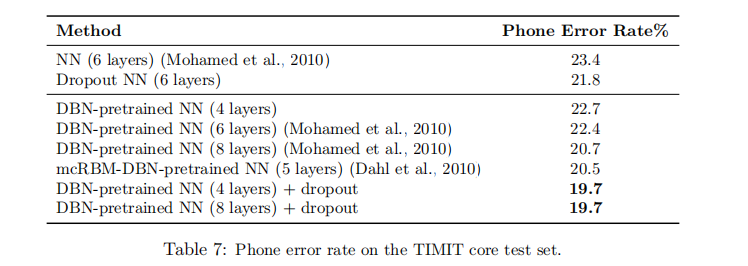

## 6.3 Results on a Text Data Set

## 6.3文本数据集的结果



To test the usefulness of dropout in the text domain, we used dropout networks to train adocument classifier. We used a subset of the Reuters-RCV1 data set which is a collection ofover 800,000 newswire articles from Reuters. These articles cover a variety of topics. Thetask is to take a bag of words representation of a document and classify it into 50 disjointtopics. Appendix B.5 describes the setup in more detail. Our best neural net which didnot use dropout obtained an error rate of 31.05%. Adding dropout reduced the error to29.62%. We found that the improvement was much smaller compared to that for the visionand speech data sets.

为了测试dropout在文本域的有效性，我们使用dropout网络来训练一个分类器。我们使用了路透社rcv1数据集的一个子集，该数据集收集了来自路透社的80多万篇新闻专线文章。这些文章涵盖了各种各样的主题。任务是用一袋单词表示一份文件，并将其分类为50个分离主题。附录B.5更详细地描述了该设置。我们最好的没有使用dropout的神经网络的错误率为31.05%。加上dropout将错误减少到29.62%。我们发现，与视觉和语音数据集相比，这种改进要小得多。



## 6.4 Comparison with Bayesian Neural Networks

## 6.4与贝叶斯神经网络的比较



Dropout can be seen as a way of doing an equally-weighted averaging of exponentially manymodels with shared weights. On the other hand, Bayesian neural networks (Neal, 1996) arethe proper way of doing model averaging over the space of neural network structures andparameters. In dropout, each model is weighted equally, whereas in a Bayesian neuralnetwork each model is weighted taking into account the prior and how well the model fitsthe data, which is the more correct approach. Bayesian neural nets are extremely useful forsolving problems in domains where data is scarce such as medical diagnosis, genetics, drugdiscovery and other computational biology applications. However, Bayesian neural nets areslow to train and difficult to scale to very large network sizes. Besides, it is expensive toget predictions from many large nets at test time. On the other hand, dropout neural netsare much faster to train and use at test time. In this section, we report experiments thatcompare Bayesian neural nets with dropout neural nets on a small data set where Bayesianneural networks are known to perform well and obtain state-of-the-art results. The aim isto analyze how much does dropout lose compared to Bayesian neural nets.

Dropout可以被看作是一种对共享权重的指数模型进行等权重平均的方法。另一方面，Bayesian神经网络(Neal, 1996)是在神经网络结构和参数空间上进行模型平均的合适方法。在dropout中，每个模型的权重是相等的，而在贝叶斯神经网络中，每个模型的权重都考虑到先验和模型与数据的匹配程度，这是更正确的方法。贝叶斯神经网络对于解决诸如医学诊断、遗传学、药物发现和其他计算生物学应用等数据匮乏领域的问题非常有用。然而，贝叶斯神经网络训练缓慢，很难扩展到非常大的网络规模。此外，在测试时从许多大型网络获得预测是昂贵的。另一方面，dropout神经网络在训练和测试时使用要快得多。在本节中，我们报告了在一个小数据集上比较贝叶斯神经网络和dropout神经网络的实验，其中贝叶斯神经网络的表现很好，并获得了最先进的结果。目的是分析与贝叶斯神经网络相比，dropout损失了多少。



The data set that we use (Xiong et al., 2011) comes from the domain of genetics. Thetask is to predict the occurrence of alternative splicing based on RNA features. Alternativesplicing is a significant cause of cellular diversity in mammalian tissues. Predicting theoccurrence of alternate splicing in certain tissues under different conditions is important forunderstanding many human diseases. Given the RNA features, the task is to predict theprobability of three splicing related events that biologists care about. The evaluation metricis Code Quality which is a measure of the negative KL divergence between the target andthe predicted probability distributions (higher is better). Appendix B.6 includes a detaileddescription of the data set and this performance metric.

我们使用的数据集(Xiong et al.， 2011)来自遗传学领域。任务是根据RNA特征预测选择性剪接的发生。交叠是哺乳动物组织细胞多样性的重要原因。预测在不同条件下某些组织中交替剪接的发生对于理解许多人类疾病是很重要的。根据RNA的特征，任务是预测生物学家关心的三种剪接相关事件的概率。metricis代码质量评估是对目标和预测概率分布之间负KL散度的度量(越大越好)。附录B.6包括数据集和这个性能度量的详细描述。

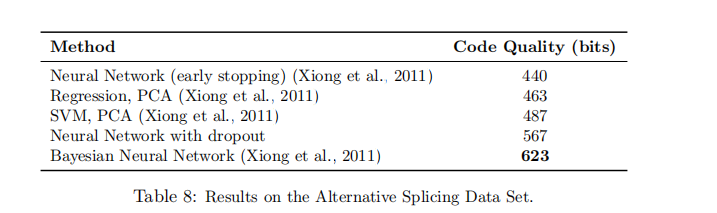

Table 8 summarizes the performance of different models on this data set. Xiong et al.(2011) used Bayesian neural nets for this task. As expected, we found that Bayesian neuralnets perform better than dropout. However, we see that dropout improves significantlyupon the performance of standard neural nets and outperforms all other methods. Thechallenge in this data set is to prevent overfitting since the size of the training set is small. One way to prevent overfitting is to reduce the input dimensionality using PCA. Thereafter,standard techniques such as SVMs or logistic regression can be used. However, with dropoutwe were able to prevent overfitting without the need to do dimensionality reduction. Thedropout nets are very large (1000s of hidden units) compared to a few tens of units in the Bayesian network. This shows that dropout has a strong regularizing effect.

表8总结了不同模型在该数据集上的性能。Xiong等人(2011)使用贝叶斯神经网络完成了这项任务。正如所料，我们发现贝叶斯神经网络比辍学表现更好。然而，我们看到，dropout大大提高了标准神经网络的性能，并优于所有其他方法。这个数据集的挑战是防止过拟合，因为训练集的大小很小。防止过拟合的一种方法是使用PCA降低输入维数。然后，标准技术，如支持向量机或逻辑回归可以使用。然而，有了dropout，我们可以避免过度拟合，而不需要进行降维。与贝叶斯网络中几十个单元相比，dropout网非常大(隐藏单元为1000s)。说明辍学具有较强的调节作用。



## 6.5 Comparison with Standard Regularizers

## 6.5与标准调整器的比较



Several regularization methods have been proposed for preventing overfitting in neural networks. These include L2 weight decay (more generally Tikhonov regularization (Tikhonov,1943)), lasso (Tibshirani, 1996), KL-sparsity and max-norm regularization. Dropout canbe seen as another way of regularizing neural networks. In this section we compare dropoutwith some of these regularization methods using the MNIST data set.

针对神经网络中的过拟合问题，提出了几种正则化方法。这些包括L2权重衰减(更普遍的是Tikhonov正则化(Tikhonov,1943))， lasso (Tibshirani, 1996)， KL-sparsity和max-norm正则化。辍学可以被看作是另一种神经网络规则化的方法。在本节中，我们将使用MNIST数据集将dropout与其中一些正则化方法进行比较。



The same network architecture (784-1024-1024-2048-10) with ReLUs was trained using stochastic gradient descent with different regularizations. Table 9 shows the results. The values of different hyperparameters associated with each kind of regularization (decayconstants, target sparsity, dropout rate, max-norm upper bound) were obtained using avalidation set. We found that dropout combined with max-norm regularization gives thelowest generalization error.

利用具有不同正则化的随机梯度下降训练了具有ReLUs的相同网络结构(784-1024-1024-2048-10)。表9显示了结果。利用雪崩集得到与每一种正则化相关的不同超参数(衰变常数、目标稀疏性、丢失率、最大值-范数上界)的值。我们发现，丢失率与最大值-范数正则化相结合产生的泛化误差最小。





# 7. Salient Features

# 7. 突出的特性



The experiments described in the previous section provide strong evidence that dropoutis a useful technique for improving neural networks. In this section, we closely examinehow dropout affects a neural network. We analyze the effect of dropout on the quality offeatures produced. We see how dropout affects the sparsity of hidden unit activations. Wealso see how the advantages obtained from dropout vary with the probability of retainingunits, size of the network and the size of the training set. These observations give someinsight into why dropout works so well.

前一节中描述的实验提供了有力的证据，证明水肿是改善神经网络的一种有用的技术。在这一节中，我们将仔细研究辍学对神经网络的影响。分析了中途退出对产品质量的影响。我们看到了dropout如何影响隐藏单元激活的稀疏性。我们还可以看到，从dropout中获得的优势如何随着保留单元的概率、网络的大小和训练集的大小而变化。

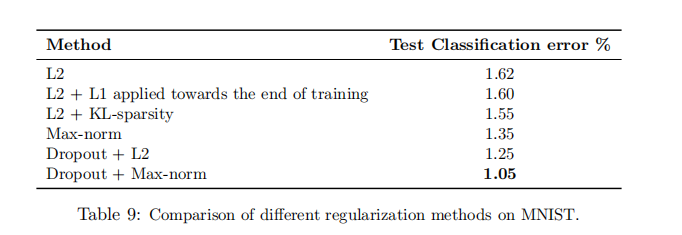

## 7.1 Effect on Features

## 7.1对特征的影响

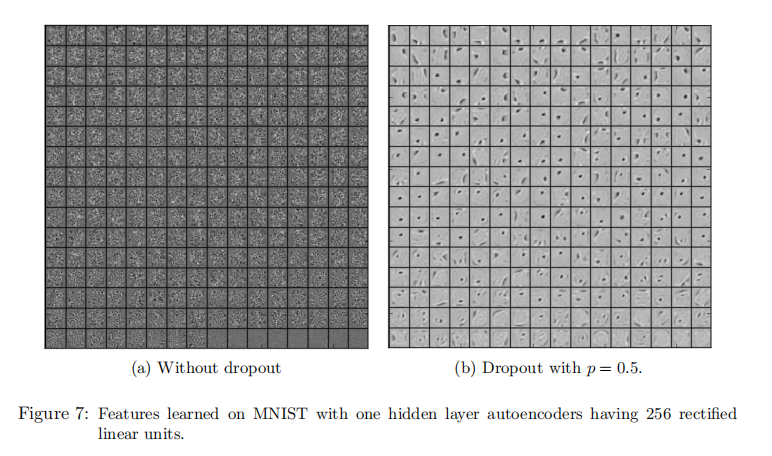

In a standard neural network, the derivative received by each parameter tells it how itshould change so the final loss function is reduced, given what all other units are doing. Therefore, units may change in a way that they fix up the mistakes of the other units. This may lead to complex co-adaptations. This in turn leads to overfitting because theseco-adaptations do not generalize to unseen data. We hypothesize that for each hidden unit,dropout prevents co-adaptation by making the presence of other hidden units unreliable. Therefore, a hidden unit cannot rely on other specific units to correct its mistakes. It mustperform well in a wide variety of different contexts provided by the other hidden units. Toobserve this effect directly, we look at the first level features learned by neural networkstrained on visual tasks with and without dropout.

在一个标准的神经网络中，每个参数接收到的导数告诉它应该如何变化，从而在给定所有其他单元的情况下减少最终损失函数。因此，单元可能会在某种程度上改变，以弥补其他单元的错误。这可能导致复杂的共同适应。这反过来又导致了过度拟合，因为这些生态适应并不能推广到不可见的数据。我们假设，对于每一个隐藏的单元，退出会使其他隐藏单元的存在变得不可靠，从而阻止协同适应。因此，一个隐藏的单位不能依靠其他特定的单位来纠正它的错误。它必须在其他隐藏单位提供的各种不同的上下文中表现良好。为了直接观察这一效果，我们研究了在视觉任务中使用或不使用神经网络学习的第一级特征。



Figure 7a shows features learned by an autoencoder on MNIST with a single hiddenlayer of 256 rectified linear units without dropout. Figure 7b shows the features learned byan identical autoencoder which used dropout in the hidden layer with p = 0.5. Both autoencoders had similar test reconstruction errors. However, it is apparent that the featuresshown in Figure 7a have co-adapted in order to produce good reconstructions. Each hiddenunit on its own does not seem to be detecting a meaningful feature. On the other hand, in Figure 7b, the hidden units seem to detect edges, strokes and spots in different parts of theimage. This shows that dropout does break up co-adaptations, which is probably the mainreason why it leads to lower generalization errors.

图7a显示了MNIST上的一个自动编码器学到的特性，该编码器只有一个隐藏层，包含256个经过校正的线性单元，没有遗漏。图7b显示了使用隐藏层中的dropout (p = 0.5)的同一个自动编码器获得的特性。两个自动编码器有相似的测试重构误差。然而，很明显，图7a中所示的特征是为了产生良好的重构而共同适应的。每个隐藏单元本身似乎并没有检测到有意义的特性。另一方面，在图7b中，隐藏单元似乎在图像的不同部分检测边缘、笔画和斑点。这表明，dropout确实会破坏协同适应，这可能是它导致更低的泛化错误的主要原因。



## 7.2 Effect on Sparsity

## 7.2对稀疏性的影响


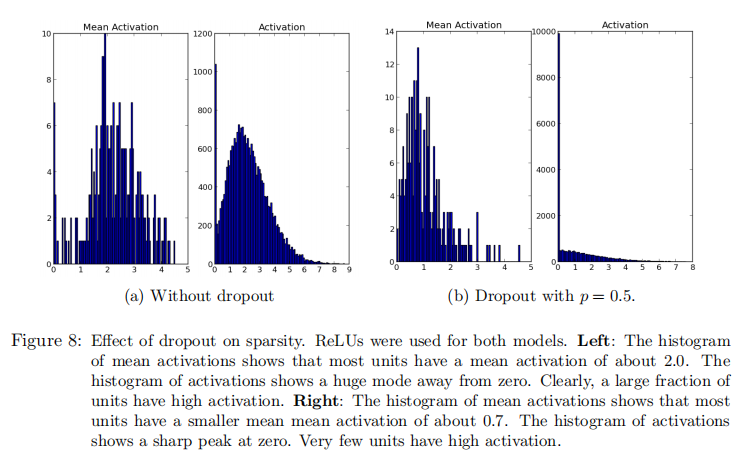
We found that as a side-effect of doing dropout, the activations of the hidden unitsbecome sparse, even when no sparsity inducing regularizers are present. Thus, dropout automatically leads to sparse representations. To observe this effect, we take the autoencoderstrained in the previous section and look at the sparsity of hidden unit activations on a random mini-batch taken from the test set. Figure 8a and Figure 8b compare the sparsity forthe two models. In a good sparse model, there should only be a few highly activated unitsfor any data case. Moreover, the average activation of any unit across data cases shouldbe low. To assess both of these qualities, we plot two histograms for each model. For eachmodel, the histogram on the left shows the distribution of mean activations of hidden unitsacross the minibatch. The histogram on the right shows the distribution of activations ofthe hidden units.

我们发现，作为退出的副作用，隐藏单元的激活变得稀疏，即使在不存在稀疏诱导调控因子的情况下。因此，dropout会自动导致稀疏表示。为了观察这一效果，我们使用前一节中的autoencoder，并查看来自测试集的一个随机小批上的隐藏单元激活的稀疏性。图8a和图8b比较了这两个模型的稀疏性。在一个好的稀疏模型中，对于任何数据情况，应该只有几个高度激活的单元。此外，跨数据用例的任何单元的平均激活率应该很低。为了评估这两个特性，我们为每个模型绘制两个直方图。对于每个模型，左边的柱状图显示了隐藏单元的平均激活在整个minibatch中的分布。右边的柱状图显示了隐藏单元激活的分布。



Comparing the histograms of activations we can see that fewer hidden units have highactivations in Figure 8b compared to Figure 8a, as seen by the significant mass away fromzero for the net that does not use dropout. The mean activations are also smaller for thedropout net. The overall mean activation of hidden units is close to 2.0 for the autoencoderwithout dropout but drops to around 0.7 when dropout is used.

比较激活的直方图，我们可以看到图8b中隐藏的高激活单位要比图8a少，这从不使用dropout的网络的显著质量远离0可以看出。平均激活也较小的辍学网。对于没有退出的自动编码器，隐藏单元的总体平均激活值接近2.0，但是当使用退出时，激活值下降到0.7左右。



## 7.3 Effect of Dropout Rate

## 7.3辍学率的影响



Dropout has a tunable hyperparameter p (the probability of retaining a unit in the network). In this section, we explore the effect of varying this hyperparameter. The comparison isdone in two situations.

Dropout有一个可调超参数p(在网络中保留一个单元的概率)。在本节中，我们将探讨改变这个超参数的影响。比较是在两种情况下进行的。



1. The number of hidden units is held constant.

1. 隐藏单位的数量保持不变。



2. The number of hidden units is changed so that the expected number of hidden unitsthat will be retained after dropout is held constant.

2. 隐藏单元的数量被改变，以便在退出后保留的隐藏单元的期望数量保持不变。



In the first case, we train the same network architecture with different amounts ofdropout. We use a 784-2048-2048-2048-10 architecture. No input dropout was used. Figure 9a shows the test error obtained as a function of p. If the architecture is held constant,having a small p means very few units will turn on during training. It can be seen that thishas led to underfitting since the training error is also high. We see that as p increases, theerror goes down. It becomes flat when 0.4 ≤ p ≤ 0.8 and then increases as p becomes close to 1.

在第一种情况下，我们用不同数量的dropout训练相同的网络架构。我们使用的是784-2048-2048-2048-10架构。没有使用输入丢失。图9a显示了得到的作为p的函数的测试错误。如果体系结构保持不变，拥有一个小的p意味着在训练期间很少有单元会打开。由此可见，由于训练误差也很大，导致了拟合不足。我们看到随着p的增加，误差减小。当0.4≤p≤0.8时趋于平缓，当p趋于1时趋于平缓。


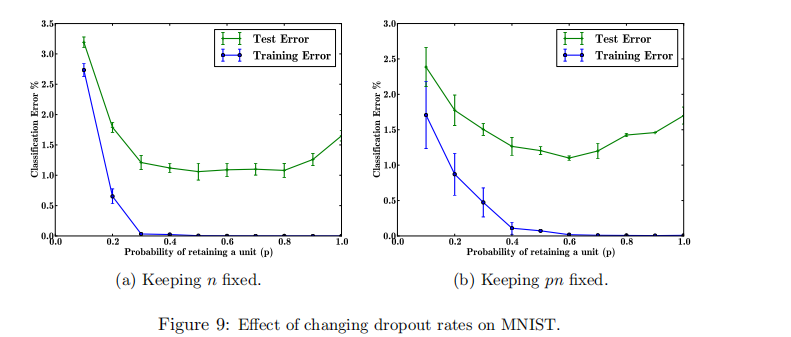
Another interesting setting is the second case in which the quantity pn is held constantwhere n is the number of hidden units in any particular layer. This means that networksthat have small p will have a large number of hidden units. Therefore, after applyingdropout, the expected number of units that are present will be the same across differentarchitectures. However, the test networks will be of different sizes. In our experiments,we set pn = 256 for the first two hidden layers and pn = 512 for the last hidden layer. Figure 9b shows the test error obtained as a function of p. We notice that the magnitudeof errors for small values of p has reduced by a lot compared to Figure 9a (for p = 0.1 it fellfrom 2.7% to 1.7%). Values of p that are close to 0.6 seem to perform best for this choiceof pn but our usual default value of 0.5 is close to optimal.

另一个有趣的设置是数量pn保持不变的第二种情况，其中n是任何特定层中隐藏的单元数。这意味着拥有小p的网络将拥有大量的隐藏单元。因此，在应用程序退出之后，在不同的架构中出现的预期单元数将是相同的。但是，测试网络的大小不同。在我们的实验中，我们设置前两个隐藏层的pn = 256，最后一个隐藏层的pn = 512。图9b显示了得到的作为p的函数的测试误差。我们注意到，与图9a相比，p的小值的误差幅度减小了很多(p = 0.1时，误差幅度从2.7%下降到1.7%)。p值接近0.6似乎在pn的这个选择中表现最好，但是我们通常的默认值0.5接近于最优。



## 7.4 Effect of Data Set Size

## 7.4数据集大小的影响



One test of a good regularizer is that it should make it possible to get good generalizationerror from models with a large number of parameters trained on small data sets. Thissection explores the effect of changing the data set size when dropout is used with feedforward networks. Huge neural networks trained in the standard way overfit massively onsmall data sets. To see if dropout can help, we run classification experiments on MNISTand vary the amount of data given to the network.

一个好的正则化器的测试是，它应该能够在小数据集上训练大量参数的模型中获得良好的泛化误差。本节探讨前馈网络使用dropout时改变数据集大小的效果。以标准方式训练的巨大的神经网络对小的数据集过度适应。为了看看dropout是否有帮助，我们在MNISTand上运行分类实验，改变给网络的数据量。

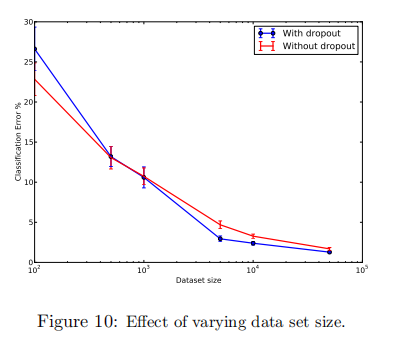

The results of these experiments areshown in Figure 10. The network was givendata sets of size 100, 500, 1K, 5K, 10Kand 50K chosen randomly from the MNISTtraining set. The same network architecture (784-1024-1024-2048-10) was used forall data sets. Dropout with p = 0.5 was performed at all the hidden layers and p = 0.8at the input layer. It can be observed thatfor extremely small data sets (100, 500)dropout does not give any improvements. The model has enough parameters that itcan overfit on the training data, even withall the noise coming from dropout. As thesize of the data set is increased, the gainfrom doing dropout increases up to a point and then declines. This suggests that for anygiven architecture and dropout rate, there is a “sweet spot” corresponding to some amountof data that is large enough to not be memorized in spite of the noise but not so large thatoverfitting is not a problem anyways.

实验结果如图10所示。该网络是在MNISTtraining集中随机选择大小为100k、500k、1K、5K、10k和50K的givendata集。所有数据集使用相同的网络架构(784-1024-1024-2048-10)。p = 0.5的Dropout在所有的隐藏层进行，p = 0.8在输入层进行。可以观察到，对于非常小的数据集(100,500)，dropout没有提供任何改进。该模型有足够的参数，可以对训练数据进行过度拟合，甚至所有噪声都来自于dropout。当数据集的大小增加时，退出的收益增加到某一点，然后下降。这表明，对于任何给定的体系结构和辍学率，都有一个“最佳点”，对应于一些数据量，这些数据量足够大，即使有噪音也无法记忆，但又不会大到过度拟合不是问题。



## 7.5 Monte-Carlo Model Averaging vs. Weight Scaling

## 7.5蒙特卡罗模型平均与权重缩放



The efficient test time procedure that wepropose is to do an approximate model combination by scaling down the weights of thetrained neural network. An expensive butmore correct way of averaging the modelsis to sample k neural nets using dropout foreach test case and average their predictions. As k → ∞, this Monte-Carlo model averagegets close to the true model average. It is interesting to see empirically how many samples k are needed to match the performanceof the approximate averaging method. Bycomputing the error for different values of kwe can see how quickly the error rate of thefinite-sample average approaches the errorrate of the true model average.

我们提出的有效的测试时间程序是通过缩小训练后的神经网络的权重来做一个近似的模型组合。这是一种昂贵但更正确的平均模型的方法，它使用每一个测试用例的dropout对k个神经网络进行抽样，并对它们的预测进行平均。当k→∞时，蒙特卡罗模型的均值接近真实模型的均值。从经验上看，需要多少样本k才能匹配近似平均法的性能，这很有趣。通过计算不同k值的误差，我们可以看到有限样本均值的错误率接近真实模型均值的错误率的速度有多快。

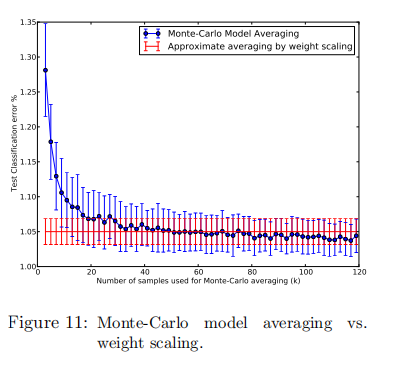

We again use the MNIST data set and do classification by averaging the predictionsof k randomly sampled neural networks. Figure 11 shows the test error rate obtained fordifferent values of k. This is compared with the error obtained using the weight scalingmethod (shown as a horizontal line). It can be seen that around k = 50, the Monte-Carlomethod becomes as good as the approximate method. Thereafter, the Monte-Carlo methodis slightly better than the approximate method but well within one standard deviation ofit. This suggests that the weight scaling method is a fairly good approximation of the truemodel average.

我们再次使用MNIST数据集，并通过对k个随机抽样神经网络的预测进行平均来进行分类。图11显示了不同k值下的测试错误率，并与使用权重缩放法得到的误差进行比较(以水平线表示)。可以看出，在k = 50左右，Monte-Carlomethod变得与近似方法一样好。此后，蒙特卡罗方法略优于近似方法，但在一个标准差之内。这表明，权重缩放方法是对真实模型平均值的一个相当好的近似。





# 8. Dropout Restricted Boltzmann Machines

# 8. 退出限制玻尔兹曼机



Besides feed-forward neural networks, dropout can also be applied to Restricted Boltzmann Machines (RBM). In this section, we formally describe this model and show some resultsto illustrate its key properties.

除了前馈神经网络，dropout还可以应用于受限玻尔兹曼机(RBM)。在本节中，我们正式地描述了这个模型，并展示了一些结果来说明它的关键属性。



## 8.1 Model Description

## 8.1模型描述



Consider an RBM with visible units v ∈ {0, 1}D and hidden units h ∈ {0, 1}F . It definesthe following probability distribution 

假设一个RBM的单位v∈{0,1}D是可见的，而单位h∈{0,1}F是隐藏的。它定义了如下的概率分布

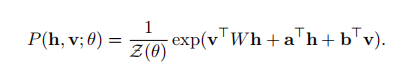

Where θ = {W, a, b} represents the model parameters and Z is the partition function.

θ= {W, a、b}代表了模型参数和Z的配分函数。



Dropout RBMs are RBMs augmented with a vector of binary random variables r ∈ {0, 1}F . Each random variable rj takes the value 1 with probability p, independent ofothers. If rj takes the value 1, the hidden unit hj is retained, otherwise it is dropped fromthe model. The joint distribution defined by a Dropout RBM can be expressed as

Dropout RBMs是用二进制随机变量r∈{0,1}F的向量增广的RBMs。每个随机变量rj的值为1，概率为p，与其他变量无关。如果rj取值1，隐藏的单元hj将被保留，否则它将从模型中删除。由一个Dropout RBM定义的联合分布可以表示为

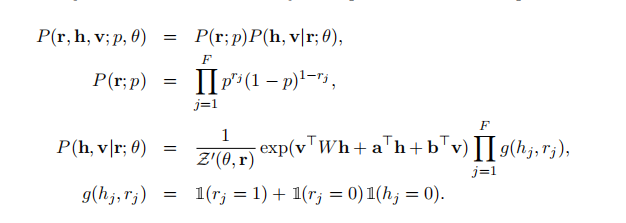

Z0(θ, r) is the normalization constant. g(hj , rj ) imposes the constraint that if rj = 0,hj must be 0. The distribution over h, conditioned on v and r is factorial

Z0(θ,r)是归一化常数。g(hj, rj)施加了这样的约束:如果rj = 0,hj必须是0。以v和r为条件的h的分布是阶乘

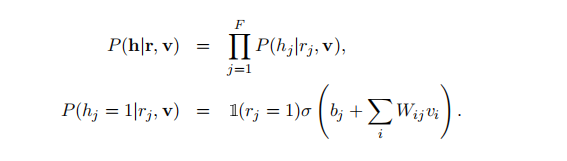

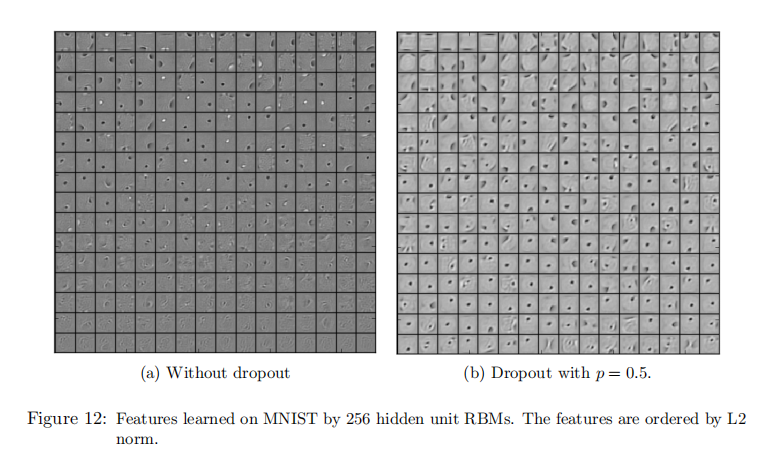

The distribution over v conditioned on h is same as that of an RBM

在h条件下v的分布与RBM相同

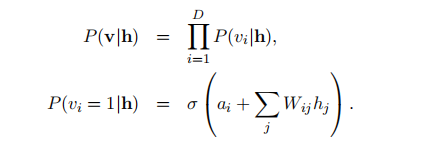

Conditioned on r, the distribution over {v, h} is same as the distribution that an RBMwould impose, except that the units for which rj = 0 are dropped from h. Therefore, the Dropout RBM model can be seen as a mixture of exponentially many RBMs with sharedweights each using a different subset of h.

条件在r,分布在{v、h} RBMwould强加的分布一样,除了单位的rj = 0从h。因此,辍学元模型可以被看作是成倍增长的混合物许多遏制sharedweights每个h的使用不同的子集。



## 8.2 Learning Dropout RBMs

## 8.2学习Dropout RBMs



Learning algorithms developed for RBMs such as Contrastive Divergence (Hinton et al.,2006) can be directly applied for learning Dropout RBMs. The only difference is that r isfirst sampled and only the hidden units that are retained are used for training. Similar todropout neural networks, a different r is sampled for each training case in every minibatch. In our experiments, we use CD-1 for training dropout RBMs.

为RBMs开发的学习算法，如对比发散(Hinton et al.，2006)，可以直接应用于学习辍学RBMs。唯一的区别是r是先采样的，仅保留的隐藏单元用于训练。与dropout神经网络相似，在每一个小批中对每个训练用例采样不同的r。在我们的实验中，我们使用CD-1来训练中途退出的rbm。



## 8.3 Effect on Features

## 8.3对特征的影响



Dropout in feed-forward networks improved the quality of features by reducing co-adaptations. This section explores whether this effect transfers to Dropout RBMs as well.

前馈网络中的缺失通过减少协同适应提高了特征的质量。本节将探讨这种效果是否也会转移到Dropout RBMs。

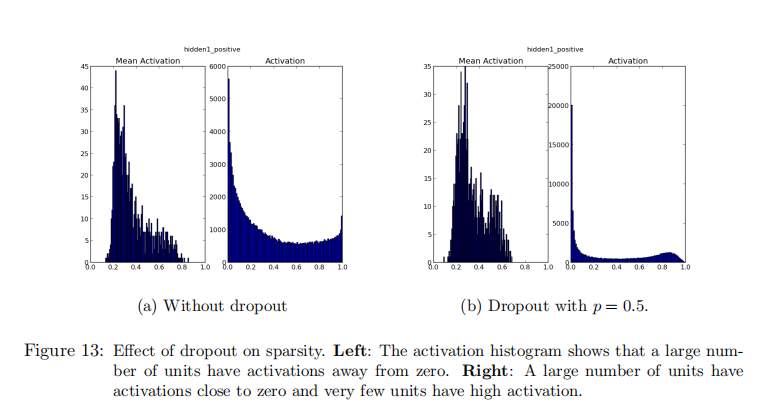

Figure 12a shows features learned by a binary RBM with 256 hidden units. Figure 12bshows features learned by a dropout RBM with the same number of hidden units. Featureslearned by the dropout RBM appear qualitatively different in the sense that they seem tocapture features that are coarser compared to the sharply defined stroke-like features in thestandard RBM. There seem to be very few dead units in the dropout RBM relative to thestandard RBM.

图12a显示了一个包含256个隐藏单元的二进制RBM所获得的特性。图12b显示了具有相同数量隐藏单位的dropout RBM学习到的特性。由dropout RBM学习到的特征在本质上是不同的，因为与标准RBM中定义明确的类中风特征相比，它们似乎捕捉到了更粗糙的特征。相对于标准弹道导弹，在空投弹道导弹中似乎很少有死亡单位。



## 8.4 Effect on Sparsity

## 8.4稀疏效应



Next, we investigate the effect of dropout RBM training on sparsity of the hidden unitactivations. Figure 13a shows the histograms of hidden unit activations and their means ona test mini-batch after training an RBM. Figure 13b shows the same for dropout RBMs. The histograms clearly indicate that the dropout RBMs learn much sparser representationsthan standard RBMs even when no additional sparsity inducing regularizer is present.

接下来，我们研究了中途退出RBM训练对隐藏单元激活的稀疏性的影响。图13a显示了隐藏单元激活的直方图，以及训练RBM后测试小批的平均值。图13b显示了同样的dropout RBMs。直方图清楚地表明，即使在没有额外的稀疏诱导正则化的情况下，dropout RBMs比标准RBMs学习到更稀疏的表示。





# 9. Marginalizing Dropout

# 9. 边缘化的Dropout



Dropout can be seen as a way of adding noise to the states of hidden units in a neuralnetwork. In this section, we explore the class of models that arise as a result of marginalizingthis noise. These models can be seen as deterministic versions of dropout. In contrast to standard (“Monte-Carlo”) dropout, these models do not need random bits and it is possibleto get gradients for the marginalized loss functions. In this section, we briefly explore these models.

Dropout可以被看作是一种向神经网络中隐藏单元的状态添加噪声的方法。在本节中，我们将探讨由于边缘化这种噪声而产生的一类模型。这些模型可以看作是Dropout的确定性版本。与标准的Dropout(“Monte-Carlo”)相比，这些模型不需要随机比特，而且可以得到边缘损失函数的梯度。在本节中，我们将简要地探讨这些模型。



Deterministic algorithms have been proposed that try to learn models that are robust tofeature deletion at test time (Globerson and Roweis, 2006). Marginalization in the contextof denoising autoencoders has been explored previously (Chen et al., 2012). The marginalization of dropout noise in the context of linear regression was discussed in Srivastava (2013). Wang and Manning (2013) further explored the idea of marginalizing dropout to speed-uptraining. van der Maaten et al. (2013) investigated different input noise distributions andthe regularizers obtained by marginalizing this noise. Wager et al. (2013) describes howdropout can be seen as an adaptive regularizer.

确定性算法已经被提出，试图学习在测试时对特征删除具有鲁棒性的模型(Globerson和Roweis, 2006)。在去噪自动编码器的背景下，边缘化已经被研究过(Chen et al.， 2012)。Srivastava(2013)讨论了线性回归背景下的dropout噪声的边缘化问题。Wang和Manning(2013)进一步探索了将Dropout边缘化到加速训练的想法。van der Maaten等人(2013)研究了不同的输入噪声分布和通过边缘化得到的正则化器。Wager et al.(2013)将howdropout描述为自适应正则化器。



## 9.1 Linear Regression

## 9.1线性回归



First we explore a very simple case of applying dropout to the classical problem of linearregression. Let X ∈ RN×D be a data matrix of N data points. y ∈ RN be a vector oftargets. Linear regression tries to find a w ∈ RD that minimizes

首先，我们探讨一个非常简单的情况下应用辍学的经典问题的线性回归。令X∈RN×D为N个数据点的数据矩阵。y∈RN是目标向量。线性回归试着找到最小化的w∈RD
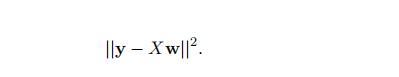


When the input X is dropped out such that any input dimension is retained withprobability p, the input can be expressed as R∗X where R ∈ {0, 1}N×D is a random matrixwith Rij ∼ Bernoulli(p) and ∗ denotes an element-wise product. Marginalizing the noise,the objective function becomes

当输入X被删除，使得任何输入维被概率p保留时，输入就可以被表示为R∗X，其中R∈{0,1}N×D是一个带有Rij ~ Bernoulli(p)的随机矩阵，而∗表示一个元素明智的乘积。将噪声边缘化，目标函数就变成了

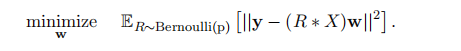

This reduces to

这减少了

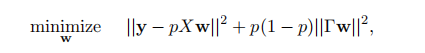

where Γ = (diag(X>X))1/2. Therefore, dropout with linear regression is equivalent, inexpectation, to ridge regression with a particular form for Γ. This form of Γ essentiallyscales the weight cost for weight wi by the standard deviation of the ith dimension of thedata. If a particular data dimension varies a lot, the regularizer tries to squeeze its weightmore.

Γ=(诊断接头(X > X)) 1/2。因此,与线性回归是等价的Dropout,inexpectation,岭回归Γ的特殊形式。这种形式的Γessentiallyscales体重的重量成本wi的第i个维度的标准差的数据。如果一个特定的数据维度变化很大，正则化器就会尝试挤压它的权重。



Another interesting way to look at this objective is to absorb the factor of p into w. This leads to the following form

另一个观察这个目标的有趣方法是把p的因子吸收到w中。这就得到了下面的形式

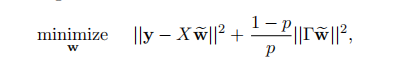

where w = pw. This makes the dependence of the regularization constant on p explicit. For p close to 1, all the inputs are retained and the regularization constant is small. Asmore dropout is done (by decreasing p), the regularization constant grows larger.

其中w = pw。这使得正则化常数对p的依赖性变得很明显。对于p接近1，所有的输入都被保留，并且正则化常数很小。随着p的减少，正则化常数越来越大。



## 9.2 Logistic Regression and Deep Networks

## 9.2逻辑回归和深层网络



For logistic regression and deep neural nets, it is hard to obtain a closed form marginalizedmodel. However, Wang and Manning (2013) showed that in the context of dropout appliedto logistic regression, the corresponding marginalized model can be trained approximately. Under reasonable assumptions, the distributions over the inputs to the logistic unit and overthe gradients of the marginalized model are Gaussian. Their means and variances can becomputed efficiently. This approximate marginalization outperforms Monte-Carlo dropoutin terms of training time and generalization performance.

对于logistic回归和深度神经网络，很难得到封闭形式的边缘化模型。然而，Wang和Manning(2013)表明，在应用logistic回归的辍学背景下，可以近似训练出相应的边缘模型。在合理的假设下，边际模型对物流单元输入和边际模型梯度的分布为高斯分布。他们的手段和方差可以有效地计算。这种近似边缘化方法在训练时间和泛化性能上都优于蒙特卡罗丢失法。



However, the assumptions involved in this technique become successively weaker as morelayers are added. Therefore, the results are not directly applicable to deep networks.

然而，随着更多relayers的加入，该技术所涉及的假设变得越来越弱。因此，这些结果并不直接适用于深层网络。
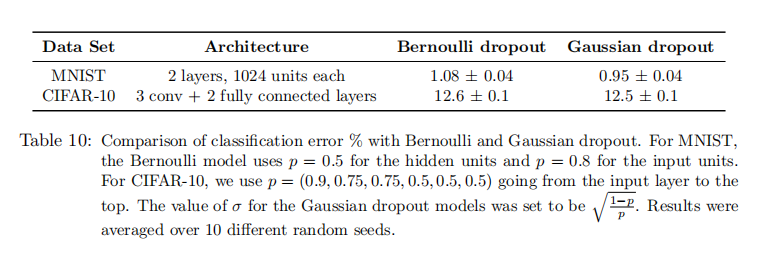



# 10. Multiplicative Gaussian Noise

# 10. 乘法高斯噪声



Dropout involves multiplying hidden activations by Bernoulli distributed random variableswhich take the value 1 with probability p and 0 otherwise. This idea can be generalizedby multiplying the activations with random variables drawn from other distributions. Werecently discovered that multiplying by a random variable drawn from N (1, 1) works justas well, or perhaps better than using Bernoulli noise. This new form of dropout amountsto adding a Gaussian distributed random variable with zero mean and standard deviationequal to the activation of the unit. That is, each hidden activation hiis perturbed tohi + hir where r ∼ N (0, 1), or equivalently hir0 where r0 ∼ N (1, 1). We can generalizethis to r0 ∼ N (1, σ2) where σ becomes an additional hyperparameter to tune, just like pwas in the standard (Bernoulli) dropout. The expected value of the activations remainsunchanged, therefore no weight scaling is required at test time.

退出涉及用伯努利分布的随机变量乘以隐藏激活，该随机变量的值为1，否则为p，否则为0。通过将激活与从其他分布中抽取的随机变量相乘，可以推广这一思想。我们最近发现，乘以一个从N(1,1)中抽取的随机变量也可以，或者可能比使用伯努利噪声更好。这种新的形式的dropout amountsto添加一个高斯分布的随机变量的均值和标准偏差为零，等于激活的单位。即,每个隐藏激活hii摄动tohi + hir r∼N(0, 1),或等同于hir0 r0∼N(1, 1)。我们可以generalizethis r0∼N(σ2)σ变得额外hyperparameter曲调,就像静脉标准(伯努利)辍学。激活的期望值保持不变，因此在测试时不需要调整权重。



In this paper, we described dropout as a method where we retain units with probability pat training time and scale down the weights by multiplying them by a factor of p at test time.

在本文中，我们将dropout描述为一种方法，在这种方法中，我们保留具有概率pat训练时间的单元，并通过在测试时将它们乘以一个p因子来缩小权重。



Another way to achieve the same effect is to scale up the retained activations by multiplyingby 1/p at training time and not modifying the weights at test time. These methods areequivalent with appropriate scaling of the learning rate and weight initializations at eachlayer.

另一种达到同样效果的方法是在训练时增加1/p的激活量，而在测试时不修改权重。这些方法与每一层适当的学习速率和权重初始化是等价的。



Therefore, dropout can be seen as multiplying hi by a Bernoulli random variable rb thattakes the value 1/p with probability p and 0 otherwise. E[rb] = 1 and V ar[rb] = (1 ∞ p)/p. For the Gaussian multiplicative noise, if we set σ2 = (1 ∞ p)/p, we end up multiplyinghi by a random variable rg, where E[rg] = 1 and V ar[rg] = (1 ∞ p)/p. Therefore, bothforms of dropout can be set up so that the random variable being multiplied by has thesame mean and variance. However, given these first and second order moments, rg has thehighest entropy and rb has the lowest. Both these extremes work well, although preliminaryexperimental results shown in Table 10 suggest that the high entropy case might workslightly better. For each layer, the value of σ in the Gaussian model was set to be q11p pusing the p from the corresponding layer in the Bernoulli model.

因此，dropout可以看作是hi乘以伯努利随机变量rb，使值1/p的概率为p，否则为0。E[rb] = 1, V ar[rb] =(1∞p)/p。高斯乘法噪声,如果我们设置σ2 = (1 p∞) / p,我们最终由一个随机变量rg multiplyinghi E (rg) = 1和V ar (rg) = (1 p∞) / p。因此，可以设置两种形式的dropout，使被乘的随机变量具有相同的均值和方差。然而，考虑到这些一阶和二阶矩，rg的熵最大，rb的熵最小。这两种极端情况都很好，尽管表10所示的初步实验结果表明，高熵情况可能稍微好一些。对于每一层,这个值σ的高斯模型将q11p布先中相应的p层伯努利模型。


# 11. Conclusion

# 11. 结论



Dropout is a technique for improving neural networks by reducing overfitting. Standardbackpropagation learning builds up brittle co-adaptations that work for the training databut do not generalize to unseen data. Random dropout breaks up these co-adaptations bymaking the presence of any particular hidden unit unreliable. This technique was foundto improve the performance of neural nets in a wide variety of application domains including object classification, digit recognition, speech recognition, document classification andanalysis of computational biology data. This suggests that dropout is a general techniqueand is not specific to any domain. Methods that use dropout achieve state-of-the-art results on SVHN, ImageNet, CIFAR-100 and MNIST. Dropout considerably improved theperformance of standard neural nets on other data sets as well.

Dropout是一种通过减少过拟合来改进神经网络的技术。标准的反向传播学习建立了脆弱的协同适应机制，这种机制适用于训练数据，但不适用于不可见的数据。随机的脱离打破了这些共同适应，使任何特定的隐藏单位的存在不可靠。该技术在对象分类、数字识别、语音识别、文档分类和计算生物学数据分析等广泛的应用领域提高了神经网络的性能。这表明，辍学是一种普遍的技术，不是特定于任何领域。使用dropout的方法在SVHN、ImageNet、CIFAR-100和MNIST上获得了最新的结果。在其他数据集上，标准神经网络的性能也有了显著提高。



This idea can be extended to Restricted Boltzmann Machines and other graphical models. The central idea of dropout is to take a large model that overfits easily and repeatedlysample and train smaller sub-models from it. RBMs easily fit into this framework. We developed Dropout RBMs and empirically showed that they have certain desirable properties.

这种思想可以扩展到受限制的玻尔兹曼机和其他图形模型。dropout的核心思想是获取一个易于重复使用的大型模型，并从中训练较小的子模型。rbm很容易适合这个框架。我们开发了Dropout RBMs，并通过实验证明它们具有某些令人满意的特性。



One of the drawbacks of dropout is that it increases training time. A dropout networktypically takes 2-3 times longer to train than a standard neural network of the same architecture. A major cause of this increase is that the parameter updates are very noisy. Each training case effectively tries to train a different random architecture. Therefore, thegradients that are being computed are not gradients of the final architecture that will beused at test time. Therefore, it is not surprising that training takes a long time. However,it is likely that this stochasticity prevents overfitting. This creates a trade-off between over-fitting and training time. With more training time, one can use high dropout and suffer lessoverfitting. However, one way to obtain some of the benefits of dropout without stochasticity is to marginalize the noise to obtain a regularizer that does the same thing as thedropout procedure, in expectation. We showed that for linear regression this regularizer isa modified form of L2 regularization. For more complicated models, it is not obvious how toobtain an equivalent regularizer. Speeding up dropout is an interesting direction for futurework.

dropout的缺点之一是增加了训练时间。一个dropout网络通常需要2-3倍的时间来训练比一个标准的神经网络相同的架构。这一增长的主要原因是参数更新非常嘈杂。每个训练案例都有效地尝试训练不同的随机架构。因此，正在计算的梯度并不是将在测试时使用的最终架构的梯度。因此，培训时间长一点也不奇怪。然而，这种随机性可能防止过拟合。这就造成了过度适应和训练时间之间的平衡。随着更多的训练时间，一个人可以使用高辍学和减少适应。然而，在不具有随机性的情况下，获得dropout的一些好处的一种方法是将噪声边缘化，以获得预期中与dropout过程相同的正则化器。我们证明了在线性回归中，这种正则化方法是L2正则化的一种改进形式。对于更复杂的模型，如何获得一个等价的正则化器还不是很明显。加速dropout是未来工作中一个有趣的方向。




# Acknowledgments

# 致谢



This research was supported by OGS, NSERC and an Early Researcher Award.

这项研究得到了OGS、NSERC和早期研究者奖的支持。



Appendix A. A Practical Guide for Training Dropout Networks

附录A.辍学网络培训实用指南



Neural networks are infamous for requiring extensive hyperparameter tuning. Dropoutnetworks are no exception. In this section, we describe heuristics that might be useful forapplying dropout.

神经网络因需要大量的超参数调整而臭名昭著。Dropoutnetworks也不例外。在本节中，我们将描述在应用dropout时可能有用的启发式方法。



## A.1 Network Size

## A. 1网络规模



It is to be expected that dropping units will reduce the capacity of a neural network. Ifn is the number of hidden units in any layer and p is the probability of retaining a unit,then instead of n hidden units, only pn units will be present after dropout, in expectation. Moreover, this set of pn units will be different each time and the units are not allowed tobuild co-adaptations freely. Therefore, if an n-sized layer is optimal for a standard neuralnet on any given task, a good dropout net should have at least n/p units. We found this tobe a useful heuristic for setting the number of hidden units in both convolutional and fullyconnected networks.

可以预期，下降的单元将减少神经网络的容量。Ifn是每一层隐藏单位的个数，p是保留一个单位的概率，那么在期望中，退出后只会出现pn单位，而不是n个隐藏单位。此外，这组pn单元每次都是不同的，不允许这些单元自由地构建协同适应。因此，如果一个n大小的层对于任何给定任务的标准神经网络来说都是最优的，那么一个好的退出网络应该至少有n/p单位。我们发现这对于设置卷积和完全连接网络中的隐藏单元数是一个有用的启发。



## A.2 Learning Rate and Momentum

## A.2学习速度和动力



Dropout introduces a significant amount of noise in the gradients compared to standardstochastic gradient descent. Therefore, a lot of gradients tend to cancel each other. Inorder to make up for this, a dropout net should typically use 10-100 times the learning ratethat was optimal for a standard neural net. Another way to reduce the effect the noise isto use a high momentum. While momentum values of 0.9 are common for standard nets,with dropout we found that values around 0.95 to 0.99 work quite a lot better. Using highlearning rate and/or momentum significantly speed up learning.

与标准的随机梯度下降法相比，梯度下降法在梯度上引入了大量的噪声。因此，许多梯度往往互相抵消。为了弥补这一点，一个辍学网络通常应该使用10-100倍的学习速度，这是标准神经网络的最优。另一种减少噪音影响的方法是使用高动量。虽然0.9的动量值对于标准的篮网来说是很常见的，但是我们发现在0.95到0.99之间的动量值工作得更好。使用高学习速度和/或动力可以显著加快学习。



## A.3 Max-norm Regularization

## A.3 Max-norm正规化



Though large momentum and learning rate speed up learning, they sometimes cause thenetwork weights to grow very large. To prevent this, we can use max-norm regularization. This constrains the norm of the vector of incoming weights at each hidden unit to be boundby a constant c. Typical values of c range from 3 to 4.

虽然大的动量和学习率可以加速学习，但它们有时会导致网络的权重变得非常大。为了防止这种情况，我们可以使用max-norm正则化。这就限制了每个隐藏单元的输入权向量的范数以一个常数c为界。c的典型值为3到4。



## A.4 Dropout Rate

## A.4 Dropout率



Dropout introduces an extra hyperparameter—the probability of retaining a unit p. Thishyperparameter controls the intensity of dropout. p = 1, implies no dropout and low valuesof p mean more dropout. Typical values of p for hidden units are in the range 0.5 to 0.8. For input layers, the choice depends on the kind of input. For real-valued inputs (imagepatches or speech frames), a typical value is 0.8. For hidden layers, the choice of p is coupledwith the choice of number of hidden units n. Smaller p requires big n which slows downthe training and leads to underfitting. Large p may not produce enough dropout to preventoverfitting.

Dropout引入了一个额外的超参数——保留一个单位p的概率。这个参数控制着Dropout的强度。p = 1，表示没有退学，而p值越低，退学越严重。隐含单位的典型p值在0.5 ~ 0.8之间。对于输入层，选择取决于输入的类型。对于实值输入(图像传感器或语音帧)，一个典型的值是0.8。对于隐层，p的选择与隐层个数n的选择相结合，较小的p需要较大的n，这会减慢训练速度，导致欠拟合。大p可能不会产生足够的脱落来防止安装。



Appendix B. Detailed Description of Experiments and Data Sets.

附录B.实验和数据集的详细描述。



This section describes the network architectures and training details for the experimentalresults reported in this paper. The code for reproducing these results can be obtained fromhttp://www.cs.toronto.edu/~nitish/dropout. The implementation is GPU-based. Weused the excellent CUDA libraries—cudamat (Mnih, 2009) and cuda-convnet (Krizhevskyet al., 2012) to implement our networks.

本节描述了本文实验结果的网络结构和训练细节。复制这些结果的代码可以从http://www.cs.toronto.edu/~nitish/dropout获得。实现是基于gpu的。我们使用优秀的CUDA图书馆cudamat (Mnih, 2009)和CUDA -convnet (Krizhevskyet al.， 2012)来实现我们的网络。



## B.1 MNIST

## B.1 MNIST



The MNIST data set consists of 60,000 training and 10,000 test examples each representinga 28×28 digit image. We held out 10,000 random training images for validation. Hyperparameters were tuned on the validation set such that the best validation error was producedafter 1 million weight updates. The validation set was then combined with the training setand training was done for 1 million weight updates. This net was used to evaluate the performance on the test set. This way of using the validation set was chosen because we foundthat it was easy to set up hyperparameters so that early stopping was not required at all. Therefore, once the hyperparameters were fixed, it made sense to combine the validationand training sets and train for a very long time.

MNIST数据集由6万个训练样本和1万个测试样本组成，每个样本代表一个28×28的数字图像。我们随机拿出10,000张训练图像进行验证。超参数在验证集上进行调优，以便在一百万次权重更新之后产生最佳验证错误。然后将验证集与训练集结合，并对一百万次体重更新进行训练。这个网络用于评估测试集上的性能。之所以选择这种使用验证集的方式，是因为我们发现设置超参数很容易，所以根本不需要提前停止。因此，一旦确定了超参数，就有必要将验证和训练集结合起来，并进行长时间的训练。



The architectures shown in Figure 4 include all combinations of 2, 3, and 4 layer networkswith 1024 and 2048 units in each layer. Thus, there are six architectures in all. For all thearchitectures (including the ones reported in Table 2), we used p = 0.5 in all hidden layersand p = 0.8 in the input layer. A final momentum of 0.95 and weight constraints with c = 2was used in all the layers.

图4所示的架构包括2、3和4层网络的所有组合，每个层有1024和2048个单元。因此，总共有六个架构。对于所有架构(包括表2中报告的架构)，我们在所有隐藏层中使用p = 0.5，在输入层中使用p = 0.8。最终动量为0.95，权重约束为c = 2，用于所有层。



To test the limits of dropout’s regularization power, we also experimented with 2 and 3layer nets having 4096 and 8192 units. 2 layer nets gave improvements as shown in Table 2. However, the three layer nets performed slightly worse than 2 layer ones with the samelevel of dropout. When we increased dropout, performance improved but not enough tooutperform the 2 layer nets.

为了测试dropout的正则化能力的极限，我们还对具有4096和8192单元的2层和3层网进行了实验。2层网的改进如表2所示。然而，三层网的表现略差于2层网，具有相同的水平的辍学。当我们增加辍学率，性能有所提高，但还不足以超过2层网。



## B.2 SVHN

## B.2 SVHN



The SVHN data set consists of approximately 600,000 training images and 26,000 testimages. The training set consists of two parts—A standard labeled training set and anotherset of labeled examples that are easy. A validation set was constructed by taking examplesfrom both the parts. Two-thirds of it were taken from the standard set (400 per class) andone-third from the extra set (200 per class), a total of 6000 samples. This same processis used by Sermanet et al. (2012). The inputs were RGB pixels normalized to have zeromean and unit variance. Other preprocessing techniques such as global or local contrastnormalization or ZCA whitening did not give any noticeable improvements.

SVHN数据集由大约600,000张训练图像和26,000个testimages组成。训练集由两个部分组成——一个标准的标记训练集和另一个标记示例集。通过从这两个部分中选取样本来构造验证集。其中三分之二取自标准组(每班400个)，三分之一取自额外组(每班200个)，总共6000个样本。Sermanet et al.(2012)使用了相同的过程。输入是RGB像素归一化为零和单位方差。其他预处理技术，如全局或局部对比正规化或ZCA白化没有任何明显的改善。



The best architecture that we found uses three convolutional layers each followed bya max-pooling layer. The convolutional layers have 96, 128 and 256 filters respectively. Each convolutional layer has a 5 × 5 receptive field applied with a stride of 1 pixel. Eachmax pooling layer pools 3 × 3 regions at strides of 2 pixels. The convolutional layers arefollowed by two fully connected hidden layers having 2048 units each. All units use therectified linear activation function. Dropout was applied to all the layers of the networkwith the probability of retaining the unit being p = (0.9, 0.75, 0.75, 0.5, 0.5, 0.5) for thedifferent layers of the network (going from input to convolutional layers to fully connectedlayers). In addition, the max-norm constraint with c = 4 was used for all the weights. Amomentum of 0.95 was used in all the layers. These hyperparameters were tuned using avalidation set. Since the training set was quite large, we did not combine the validationset with the training set for final training. We reported test error of the model that hadsmallest validation error.

我们发现的最佳架构使用三个卷积层，每个卷积层后面都有一个最大池化层。卷积层分别有96、128和256个过滤器。每个卷积层都有一个5×5的接受域，其步长为1像素。每个最大的池层池3×3个区域在2像素的步长。卷积层之后是两个完全连接的隐藏层，每个隐藏层有2048个单元。所有单元均采用线性激活函数。Dropout应用于网络的所有层，对于网络的不同层(从输入层到卷积层再到全连接层)，单元保留的概率为p =(0.9, 0.75, 0.75, 0.5, 0.5, 0.5)。此外，所有权值均采用c = 4的max-norm约束。所有层均使用0.95的Amomentum。这些超参数是使用雪崩集进行调优的。由于训练集非常大，我们没有将验证集与最终训练集结合起来。我们报告了验证误差最小的模型的测试误差。



## B.3 CIFAR-10 and CIFAR-100

## B.3 CIFAR-10和CIFAR-100



The CIFAR-10 and CIFAR-100 data sets consists of 50,000 training and 10,000 test imageseach. They have 10 and 100 image categories respectively. These are 32 × 32 color images. We used 5,000 of the training images for validation. We followed the procedure similarto MNIST, where we found the best hyperparameters using the validation set and thencombined it with the training set. The images were preprocessed by doing global contrastnormalization in each color channel followed by ZCA whitening. Global contrast normalization means that for image and each color channel in that image, we compute the meanof the pixel intensities and subtract it from the channel. ZCA whitening means that wemean center the data, rotate it onto its principle components, normalize each componentand then rotate it back. The network architecture and dropout rates are same as that forSVHN, except the learning rates for the input layer which had to be set to smaller values.

CIFAR-10和CIFAR-100数据集由50,000个训练和10,000个测试图像组成。它们分别有10个和100个图像类别。这些是32×32的彩色图片。我们使用了5000张训练图像进行验证。我们遵循similarto MNIST程序，使用验证集找到最佳超参数，并将其与训练集相结合。对图像进行预处理，在每个颜色通道进行全局对比归一化，然后进行ZCA白化。全局对比归一化是指对于图像和图像中的每个颜色通道，我们计算像素强度的平均值并从通道中减去它。ZCA白化是指wemean将数据集中起来，将其旋转到其主组件上，对每个组件进行规范化，然后再将其旋转回来。网络架构和退学率与svhn相同，除了输入层的学习率必须设置为较小的值。



## B.4 TIMIT

## B.4 TIMIT



The open source Kaldi toolkit (Povey et al., 2011) was used to preprocess the data into log-filter banks. A monophone system was trained to do a forced alignment and to get labels forspeech frames. Dropout neural networks were trained on windows of 21 consecutive framesto predict the label of the central frame. No speaker dependent operations were performed. The inputs were mean centered and normalized to have unit variance.

使用开源Kaldi工具包(Povey et al.， 2011)将数据预处理到日志过滤器库。一个单声道系统被训练去做一个强制的对准和得到语音帧的标签。在21个连续帧的窗口上训练Dropout神经网络来预测中心帧的标签。没有执行与扬声器相关的操作。输入以均值为中心，归一化为单位方差。



We used probability of retention p = 0.8 in the input layers and 0.5 in the hidden layers.Max-norm constraint with c = 4 was used in all the layers. A momentum of 0.95 with ahigh learning rate of 0.1 was used. The learning rate was decayed as 0(1 + t/T))1. ForDBN pretraining, we trained RBMs using CD-1. The variance of each input unit for the

我们使用的保留概率p = 0.8在输入层和0.5在隐藏层。所有层都使用c = 4的Max-norm约束。使用的动量为0.95，学习速率为0.1。The 学习 速率 是 腐朽 0(1 + t/T))1.ForDBN培训前，我们使用CD-1培训RBMs。的每个输入单元的方差



Gaussian RBM was fixed to 1. For finetuning the DBN with dropout, we found that inorder to get the best results it was important to use a smaller learning rate (about 0.01).

高斯RBM固定为1。对于带有dropout的DBN进行微调，我们发现为了获得最佳结果，使用较小的学习率(约0.01)是很重要的。



Adding max-norm constraints did not give any improvements.

添加max-norm约束并没有带来任何改进。



## B.5 Reuters

## B.5路透社



The Reuters RCV1 corpus contains more than 800,000 documents categorized into 103classes. These classes are arranged in a tree hierarchy. We created a subset of this data setconsisting of 402,738 articles and a vocabulary of 2000 words comprising of 50 categoriesin which each document belongs to exactly one class. The data was split into equal sizedtraining and test sets. We tried many network architectures and found that dropout gaveimprovements in classification accuracy over all of them. However, the improvement wasnot as significant as that for the image and speech data sets. This might be explained bythe fact that this data set is quite big (more than 200,000 training examples) and overfittingis not a very serious problem.

路透社RCV1语料库包含超过80万份文件，分类为103个类别。这些类按照树的层次结构排列。我们创建了这个数据集的一个子集，包括402,738篇文章和一个包含50个类别的2000个单词的词汇表，每个文档只属于一个类。数据被分成同等大小的训练和测试集。我们尝试了许多网络架构，发现dropout在所有这些架构之上都能提高分类的准确性。然而，这种改进并不像图像和语音数据集那样显著。这可能是因为这个数据集非常大(超过200,000个训练示例)，而过度适配并不是一个非常严重的问题。



## B.6 Alternative Splicing

## B.6可变剪接

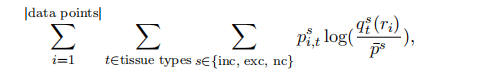

The alternative splicing data set consists of data for 3665 cassette exons, 1014 RNA featuresand 4 tissue types derived from 27 mouse tissues. For each input, the target consists of 4softmax units (one for tissue type). Each softmax unit has 3 states (inc, exc, nc) which areof the biological importance. For each softmax unit, the aim is to predict a distribution overthese 3 states that matches the observed distribution from wet lab experiments as closelyas possible. The evaluation metric is Code Quality which is defined aswhere, psi,t is the target probability for state s and tissue type t in input i; qst(ri) is thepredicted probability for state s in tissue type t for input ri and ¯psis the average of psi,tover i and t.

备选剪接数据集包括来自27个小鼠组织的3665盒外显子、1014个RNA特征和4种组织类型的数据。对于每个输入，目标由4softmax单元(一个用于组织类型)组成。每个softmax单元有3个状态(inc, exc, nc)，这是生物的重要性。对于每个softmax单元，其目的是预测这3种状态的分布，以尽可能接近湿实验室实验中观察到的分布。评价指标为代码质量，定义为:其中，psi,t为输入i中状态s和组织类型t的目标概率;qst(ri)是组织类型t中状态s的预测概率，输入ri和¯psis是psi、tover i和t的平均值。



A two layer dropout network with 1024 units in each layer was trained on this data set. A value of p = 0.5 was used for the hidden layer and p = 0.7 for the input layer. Max-normregularization with high decaying learning rates was used. Results were averaged across thesame 5 folds used by Xiong et al. (2011).

在该数据集上训练一个每层1024个单位的两层dropout网络，隐含层使用p = 0.5，输入层使用p = 0.7。采用高衰减学习率的最大正则化方法。熊等人(2011)在相同的5次折叠中对结果进行了平均。


